In [2]:
import numpy as np
import pandas as pd
from datetime import date, datetime
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from scipy.stats import pearsonr
from scipy.stats import shapiro
from scipy import stats
from plotly.subplots import make_subplots
import plotly.io as pio
import scipy.optimize as sco
pio.templates.default = "plotly_white"

In [5]:
Stock_price_df=pd.read_csv(r"C:\Users\hsvie\Desktop\nckh\data\Stock_price.csv")
Stock_info_df=pd.read_csv(r"C:\Users\hsvie\Desktop\nckh\data\Stock_info.csv")

##Biểu đồ nến


Biểu đồ được cung cấp gồm hai phần chính: biểu đồ giá cổ phiếu và biểu đồ khối lượng giao dịch (Volume Traded). Biểu đồ giá sử dụng mô hình nến Nhật (Candlestick) để thể hiện sự biến động giá cổ phiếu qua từng giai đoạn, trong đó mỗi cây nến biểu thị giá mở cửa, giá đóng cửa, giá cao nhất, và giá thấp nhất trong ngày giao dịch. Biểu đồ khối lượng giao dịch, đặt phía dưới, hiển thị số lượng cổ phiếu được trao đổi, phản ánh mức độ quan tâm của nhà đầu tư.

Dữ liệu đầu vào để vẽ biểu đồ bao gồm giá cổ phiếu (mở cửa, đóng cửa, cao nhất, thấp nhất), khối lượng giao dịch hàng ngày, và chuỗi thời gian từ cuối năm 2022 đến cuối năm 2024. Biểu đồ nến Nhật được sử dụng để theo dõi sự biến động giá cổ phiếu, trong khi các cột khối lượng giao dịch hỗ trợ đánh giá tâm lý và hành vi của nhà đầu tư.

Mục đích của việc vẽ các biểu đồ này là cung cấp cái nhìn tổng quan về xu hướng giá cổ phiếu, giúp nhà đầu tư xác định các cơ hội mua bán tiềm năng. Khối lượng giao dịch phản ánh sự quan tâm của thị trường và thường gắn liền với các biến động giá mạnh. Sự kết hợp giữa biểu đồ giá và khối lượng giao dịch là công cụ quan trọng để phân tích kỹ thuật, giúp nhận diện các tín hiệu như phá vỡ (breakout) hay đảo chiều (reversal). Nhờ đó, nhà đầu tư có thể đưa ra các quyết định chiến lược và quản lý rủi ro hiệu quả, dự đoán xu hướng giá cổ phiếu trong tương lai và tối ưu hóa lợi nhuận.

In [6]:

unique_tickers = Stock_price_df['stock_name'].unique()

for ticker in unique_tickers:
    ticker_data = Stock_price_df[Stock_price_df['stock_name'] == ticker].copy()
    ticker_data['date'] = pd.to_datetime(ticker_data['date'])
    ticker_data.set_index('date', inplace=True)

    candlestick = go.Candlestick(x=ticker_data.index,
                                 open=ticker_data['open'],
                                 high=ticker_data['high'],
                                 low=ticker_data['low'],
                                 close=ticker_data['close'])

    volume = go.Bar(x=ticker_data.index, y=ticker_data['volume'], name='Volume', marker_color='orange')

    fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                        vertical_spacing=0.03, subplot_titles=(f'{ticker} - Stock Price', f'{ticker} - Volume Traded'),
                        row_width=[0.2, 0.7])

    fig.add_trace(candlestick, row=1, col=1)
    fig.add_trace(volume, row=2, col=1)

    fig.update_layout(height=900, title_text=f'{ticker} - Stock Analysis', xaxis_rangeslider_visible=False)
    fig.update_xaxes(title_text='Date', row=2, col=1)
    fig.update_yaxes(title_text='Price', row=1, col=1)
    fig.update_yaxes(title_text='Volume', row=2, col=1)

    fig.show()

# **1.PHÂN TÍCH ĐỊCH LƯỢNG THỊ TRƯỜNG CHỨNG KHOÁN**



###**Thống kê mô tả**

Thống kê mô tả sẽ cung cấp số liệu thống kê tóm tắt cho từng cổ phiếu trong tập dữ liệu. Chúng ta sẽ xem xét các biện pháp như trung bình, trung vị, độ lệch chuẩn,... cho giá đóng cửa:

In [7]:
descriptive_stats = Stock_price_df.groupby('stock_name')['close'].describe()

print(descriptive_stats)

            count          mean           std      min      25%      50%  \
stock_name                                                                 
CMG         522.0  40948.503831  10283.793557  25040.0  32320.0  38310.0   
CTG         522.0  28737.703065   4437.252997  17720.0  25692.5  26900.0   
HSG         522.0  18237.680077   4160.979540   6960.0  14950.0  19560.0   
VIC         522.0  49399.231801   7398.980489  40400.0  43000.0  47025.0   

                75%      max  
stock_name                    
CMG         47825.0  70600.0  
CTG         32600.0  37000.0  
HSG         21440.0  25350.0  
VIC         53500.0  75600.0  


In [8]:
descriptive_stats

count          mean           std      min      25%      50%  \
stock_name                                                                 
CMG         522.0  40948.503831  10283.793557  25040.0  32320.0  38310.0   
CTG         522.0  28737.703065   4437.252997  17720.0  25692.5  26900.0   
HSG         522.0  18237.680077   4160.979540   6960.0  14950.0  19560.0   
VIC         522.0  49399.231801   7398.980489  40400.0  43000.0  47025.0   

                75%      max  
stock_name                    
CMG         47825.0  70600.0  
CTG         32600.0  37000.0  
HSG         21440.0  25350.0  
VIC         53500.0  75600.0

CMG

Count: 522.0 (Số lượng quan sát hoặc ngày giao dịch có trong tập dữ liệu của CMG)

Mean: 409848.5038 (Giá đóng cửa trung bình)

Standard Deviation: 10283.7935 (Đo mức độ biến động hoặc phân tán của giá đóng cửa)

Minimum: 25040.0 (Giá đóng cửa thấp nhất )

25th Percentile: 32320.0 (25% giá đóng cửa thấp hơn giá trị này))

Median (50%): 38310.0 (Giá trị trung bình của giá đóng cửa)

75th Percentile: 47825.0 (75% giá đóng cửa thấp hơn giá trị này)

Maximum: 70600 (Giá đóng cửa cao nhất )

CTG

Count: 522.0 (Số lượng quan sát hoặc ngày giao dịch có trong tập dữ liệu của CTG)

Mean: 28737.7030 (Giá đóng cửa trung bình)

Standard Deviation: 44437.2529 (Đo mức độ biến động hoặc phân tán của giá đóng cửa)

Minimum: 17720.0 (Giá đóng cửa thấp nhất )

25th Percentile: 25692.5 (25% giá đóng cửa thấp hơn giá trị này))

Median (50%): 26900.0 (Giá trị trung bình của giá đóng cửa)

75th Percentile: 32600.0 (75% giá đóng cửa thấp hơn giá trị này)

Maximum: 37000 (Giá đóng cửa cao nhất )

HSG

Count: 522.0 (Số lượng quan sát hoặc ngày giao dịch có trong tập dữ liệu của HSG)

Mean: 18237.6800 (Giá đóng cửa trung bình)

Standard Deviation: 4160.9795 (Đo mức độ biến động hoặc phân tán của giá đóng cửa)

Minimum: 6960.0 (Giá đóng cửa thấp nhất )

25th Percentile: 14950.0 (25% giá đóng cửa thấp hơn giá trị này))

Median (50%): 38310.0 (Giá trị trung bình của giá đóng cửa)

75th Percentile: 21440.0 (75% giá đóng cửa thấp hơn giá trị này)

Maximum: 25350 (Giá đóng cửa cao nhất )

VIC

Count: 522.0 (Số lượng quan sát hoặc ngày giao dịch có trong tập dữ liệu của VIC)

Mean: 49399.2318 (Giá đóng cửa trung bình)

Standard Deviation: 7398.9804 (Đo mức độ biến động hoặc phân tán của giá đóng cửa)

Minimum: 40440.0 (Giá đóng cửa thấp nhất )

25th Percentile: 43000.0 (25% giá đóng cửa thấp hơn giá trị này))

Median (50%): 47025.0 (Giá trị trung bình của giá đóng cửa)

75th Percentile: 53500.0 (75% giá đóng cửa thấp hơn giá trị này)

Maximum: 75600 (Giá đóng cửa cao nhất )


### **Chỉ số tài chính**

In [9]:
def analyze_stocks_with_your_data(stock_info_df):
    # Định nghĩa các ngưỡng đánh giá
    thresholds = {
        'PE': {'thấp': 10, 'trung bình': 20, 'cao': 30},
        'PB': {'thấp': 1, 'trung bình': 2.5, 'cao': 4},
        'ROE': {'kém': 0.05, 'trung bình': 0.15, 'tốt': 0.25},
        'ROA': {'kém': 0.02, 'trung bình': 0.05, 'tốt': 0.1},
        'debt_to_equity': {'tốt': 0.3, 'trung bình': 1, 'kém': 2},
        'current_ratio': {'kém': 1, 'trung bình': 1.5, 'tốt': 2},
        'dividend_yield': {'thấp': 0.01, 'trung bình': 0.03, 'cao': 0.07},
        'revenue_growth': {'kém': 0, 'trung bình': 0.1, 'tốt': 0.2},
        'profit_growth': {'kém': 0, 'trung bình': 0.1, 'tốt': 0.2}
    }

    results = {}

    # Chuyển dữ liệu từ DataFrame sang định dạng phù hợp với hàm phân tích
    stock_fundamental_data = {}

    for _, row in stock_info_df.iterrows():
        symbol = row['stock_name']

        # Tạo DataFrame cho mỗi cổ phiếu với các chỉ số hiện có
        stock_data = pd.DataFrame({
            'PE': [row['PE']],
            'PB': [row['PB']],
            'industryPE': [row['industryPE']],
            'industryPB': [row['industryPB']],
            'outstanding_share': [row['outstanding_share']],
            'industry': [row['company_name']]  # Sử dụng tên công ty tạm thời
        })

        stock_fundamental_data[symbol] = stock_data

    # Phân tích từng cổ phiếu
    for symbol, data in stock_fundamental_data.items():
        if data.empty:
            continue

        # Tính F-Score (giới hạn vì thiếu dữ liệu)
        f_score = 0
        # Trong trường hợp này, không đủ dữ liệu để tính F-Score đầy đủ
        # Chúng ta sẽ bỏ qua phần này

        # Chỉ số định giá so với ngành
        pe_to_industry = data['PE'].iloc[0] / data['industryPE'].iloc[0] if not pd.isna(data['PE'].iloc[0]) and not pd.isna(data['industryPE'].iloc[0]) and data['industryPE'].iloc[0] > 0 else None
        pb_to_industry = data['PB'].iloc[0] / data['industryPB'].iloc[0] if not pd.isna(data['PB'].iloc[0]) and not pd.isna(data['industryPB'].iloc[0]) and data['industryPB'].iloc[0] > 0 else None

        # Đánh giá định giá
        valuation_score = 0
        valuation_count = 0

        # Đánh giá PE
        if 'PE' in data.columns and not pd.isna(data['PE'].iloc[0]):
            pe_val = data['PE'].iloc[0]
            if pe_val < thresholds['PE']['thấp']:
                valuation_score += 3  # Rất rẻ
            elif pe_val < thresholds['PE']['trung bình']:
                valuation_score += 2  # Rẻ
            elif pe_val < thresholds['PE']['cao']:
                valuation_score += 1  # Trung bình
            valuation_count += 1

        # Đánh giá PB
        if 'PB' in data.columns and not pd.isna(data['PB'].iloc[0]):
            pb_val = data['PB'].iloc[0]
            if pb_val < thresholds['PB']['thấp']:
                valuation_score += 3  # Rất rẻ
            elif pb_val < thresholds['PB']['trung bình']:
                valuation_score += 2  # Rẻ
            elif pb_val < thresholds['PB']['cao']:
                valuation_score += 1  # Trung bình
            valuation_count += 1

        # Đánh giá PE so với ngành
        if pe_to_industry is not None:
            if pe_to_industry < 0.7:
                valuation_score += 3  # Rất rẻ so với ngành
            elif pe_to_industry < 0.9:
                valuation_score += 2  # Rẻ so với ngành
            elif pe_to_industry < 1.1:
                valuation_score += 1  # Ngang ngành
            valuation_count += 1

        # Đánh giá PB so với ngành
        if pb_to_industry is not None:
            if pb_to_industry < 0.7:
                valuation_score += 3  # Rất rẻ so với ngành
            elif pb_to_industry < 0.9:
                valuation_score += 2  # Rẻ so với ngành
            elif pb_to_industry < 1.1:
                valuation_score += 1  # Ngang ngành
            valuation_count += 1

        # Tính điểm định giá trung bình
        if valuation_count > 0:
            avg_valuation_score = valuation_score / valuation_count
        else:
            avg_valuation_score = None

        # Vì thiếu dữ liệu về chất lượng kinh doanh, dùng giá trị mẫu hoặc để trống
        avg_business_score = None

        # Đánh giá tổng thể dựa chỉ trên định giá (vì thiếu dữ liệu về kinh doanh)
        if avg_valuation_score is not None:
            # Chỉ sử dụng điểm định giá
            total_score = avg_valuation_score

            if total_score > 2.5:
                overall_rating = "Xuất sắc"
            elif total_score > 2.0:
                overall_rating = "Rất tốt"
            elif total_score > 1.5:
                overall_rating = "Tốt"
            elif total_score > 1.0:
                overall_rating = "Trung bình"
            else:
                overall_rating = "Kém"
        else:
            total_score = None
            overall_rating = "Không đủ dữ liệu"

        # Đánh giá vị thế trong ngành
        industry_position = None
        if pe_to_industry is not None and pb_to_industry is not None:
            if pe_to_industry < 0.8 and pb_to_industry < 0.8:
                industry_position = "Rẻ hơn nhiều so với ngành"
            elif pe_to_industry < 1 and pb_to_industry < 1:
                industry_position = "Rẻ hơn ngành"
            elif pe_to_industry > 1.2 and pb_to_industry > 1.2:
                industry_position = "Đắt hơn nhiều so với ngành"
            elif pe_to_industry > 1 and pb_to_industry > 1:
                industry_position = "Đắt hơn ngành"
            else:
                industry_position = "Tương đương ngành"

        # Lưu kết quả
        results[symbol] = {
            'f_score': f_score,
            'valuation_score': avg_valuation_score,
            'business_score': avg_business_score,
            'total_score': total_score,
            'overall_rating': overall_rating,
            'industry_position': industry_position,
            'PE': data['PE'].iloc[0] if 'PE' in data.columns else None,
            'PB': data['PB'].iloc[0] if 'PB' in data.columns else None,
            'PE_to_industry': pe_to_industry,
            'PB_to_industry': pb_to_industry
        }

    return results



# Chạy phân tích với dữ liệu của bạn
results = analyze_stocks_with_your_data(Stock_info_df)

# In kết quả
print("KẾT QUẢ PHÂN TÍCH CỔ PHIẾU\n")
print("=" * 80)
for symbol, result in results.items():
    print(f"\nMã cổ phiếu: {symbol}")
    print(f"Chỉ số PE: {result['PE']:.2f} (ngành: {Stock_info_df[Stock_info_df['stock_name']==symbol]['industryPE'].values[0]:.2f})")
    print(f"Chỉ số PB: {result['PB']:.2f} (ngành: {Stock_info_df[Stock_info_df['stock_name']==symbol]['industryPB'].values[0]:.2f})")

    if result['PE_to_industry'] is not None:
        print(f"PE so với ngành: {result['PE_to_industry']:.2f}")
    if result['PB_to_industry'] is not None:
        print(f"PB so với ngành: {result['PB_to_industry']:.2f}")

    print(f"Điểm định giá: {result['valuation_score']:.2f}/3" if result['valuation_score'] is not None else "Điểm định giá: Không đủ dữ liệu")
    print(f"Đánh giá tổng thể: {result['overall_rating']}")

    if result['industry_position'] is not None:
        print(f"Vị thế trong ngành: {result['industry_position']}")

    print("-" * 80)

KẾT QUẢ PHÂN TÍCH CỔ PHIẾU


Mã cổ phiếu: CTG
Chỉ số PE: 8.80 (ngành: 9.40)
Chỉ số PB: 1.40 (ngành: 1.50)
PE so với ngành: 0.94
PB so với ngành: 0.93
Điểm định giá: 1.75/3
Đánh giá tổng thể: Tốt
Vị thế trong ngành: Rẻ hơn ngành
--------------------------------------------------------------------------------

Mã cổ phiếu: HSG
Chỉ số PE: 24.30 (ngành: 19.30)
Chỉ số PB: 1.10 (ngành: 1.30)
PE so với ngành: 1.26
PB so với ngành: 0.85
Điểm định giá: 1.25/3
Đánh giá tổng thể: Trung bình
Vị thế trong ngành: Tương đương ngành
--------------------------------------------------------------------------------

Mã cổ phiếu: CMG
Chỉ số PE: 30.70 (ngành: 26.60)
Chỉ số PB: 3.60 (ngành: 4.20)
PE so với ngành: 1.15
PB so với ngành: 0.86
Điểm định giá: 0.75/3
Đánh giá tổng thể: Kém
Vị thế trong ngành: Tương đương ngành
--------------------------------------------------------------------------------

Mã cổ phiếu: VIC
Chỉ số PE: 16.50 (ngành: 18.10)
Chỉ số PB: 1.20 (ngành: 1.10)
PE so với ngành: 0.91
PB so 

### **Tỷ suất sinh lời**


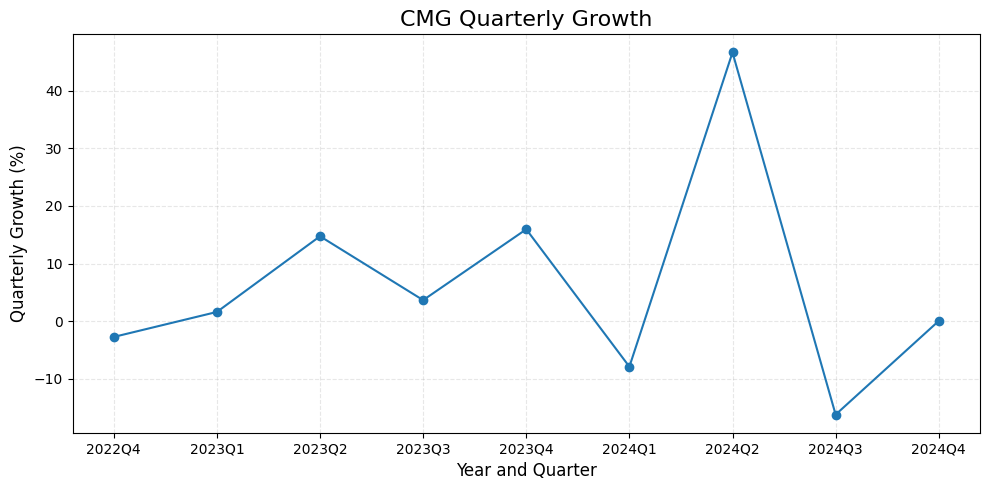

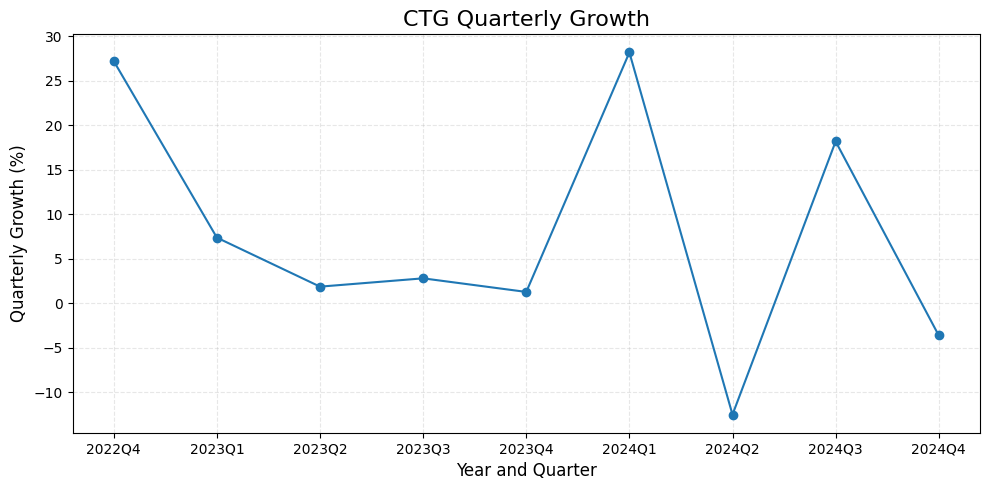

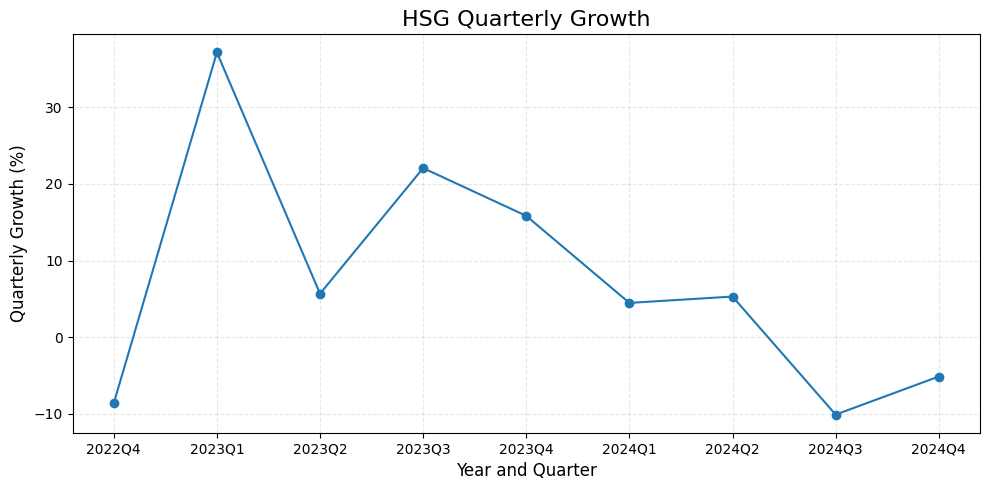

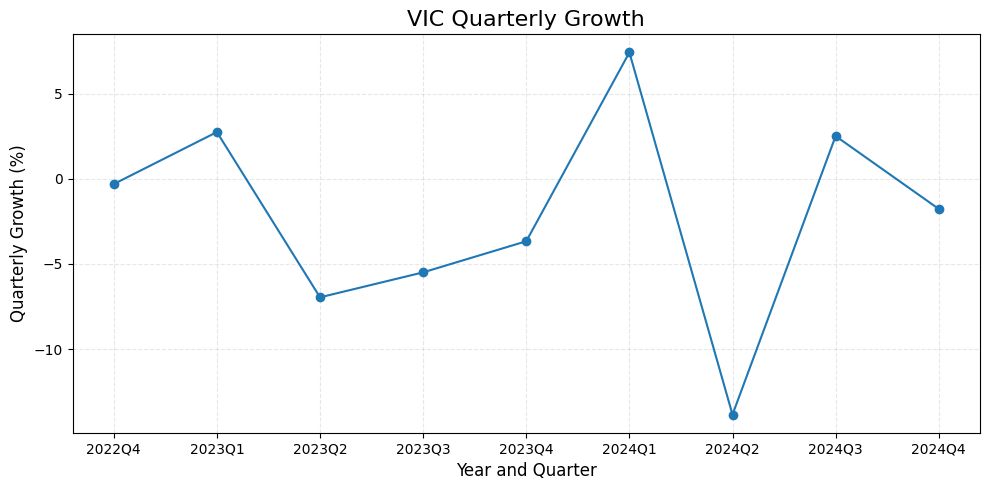

In [11]:

# Chuyển đổi cột 'date' sang kiểu datetime
Stock_price_df['date'] = pd.to_datetime(Stock_price_df['date'])
# Tính tỷ suất sinh lời hàng quý (quarterly growth)
Stock_price_df['year_quarter'] = Stock_price_df['date'].dt.to_period('Q')
Stock_price_df['quarterly_return'] = Stock_price_df.groupby('stock_name')['close'].pct_change() * 100
# Tính tỷ suất sinh lời theo năm
Stock_price_df['yearly_return'] = Stock_price_df.groupby('stock_name')['close'].pct_change(periods=4) * 100
# Chọn 4 mã cổ phiếu cần so sánh
selected_stocks = ['CMG', 'CTG', 'HSG', 'VIC']
Stock_price_df = Stock_price_df[Stock_price_df['stock_name'].isin(selected_stocks)]
# Tính tỷ suất sinh lời của mỗi mã theo từng quý
quarterly_performance = Stock_price_df.groupby(['stock_name', 'year_quarter'])['quarterly_return'].sum().reset_index()
# Tính tỷ suất sinh lời của mỗi mã theo từng năm
yearly_performance = Stock_price_df.groupby(['stock_name', Stock_price_df['date'].dt.year])['yearly_return'].sum().reset_index()
# Vẽ biểu đồ riêng cho từng mã cổ phiếu theo quý
for stock in selected_stocks:
    stock_data = quarterly_performance[quarterly_performance['stock_name'] == stock]
    plt.figure(figsize=(10, 5))
    plt.plot(stock_data['year_quarter'].astype(str), stock_data['quarterly_return'], marker='o', label=stock)
    plt.title(f'{stock} Quarterly Growth', fontsize=16)
    plt.xlabel('Year and Quarter', fontsize=12)
    plt.ylabel('Quarterly Growth (%)', fontsize=12)
    plt.grid(alpha=0.3, linestyle='--')
    plt.tight_layout()
    plt.show()


###**Phân tích chuỗi thời gian**

Tiếp theo, chúng ta sẽ tiến hành Phân tích chuỗi thời gian để xem xét các xu hướng và mô hình theo thời gian, tập trung vào giá đóng cửa:

In [12]:
Stock_price_df['date'] = pd.to_datetime(Stock_price_df['date'])

# Before pivoting, remove duplicate entries based on 'date' and 'stock_name'
Stock_price_df = Stock_price_df.drop_duplicates(subset=['date', 'stock_name'])

pivot_data = Stock_price_df.pivot(index='date', columns='stock_name', values='close')

fig = make_subplots(rows=1, cols=1)

for column in pivot_data.columns:
    fig.add_trace(
        go.Scatter(x=pivot_data.index, y=pivot_data[column], name=column),
        row=1, col=1
    )

fig.update_layout(
    title_text='Time Series of Closing Prices',
    xaxis_title='Date',
    yaxis_title='Closing Price',
    legend_title='stock_name',
    showlegend=True
)

fig.show()

Xu hướng giá cổ phiếu:
-	CMG và VIC có giá cổ phiếu cao hơn đáng kể so với CTG và HSG trong suốt giai đoạn quan sát. Đặc biệt, CMG dao động xung quanh mức 30-70 nghìn, và VIC khoảng từ 40-60 nghìn.
-	CTG và HSG có mức giá thấp hơn, với CTG dao động quanh mức 20-35 nghìn, và HSG quanh mức 10-25 nghìn.
Biến động giá:
-	VIC có sự biến động lớn trong khoảng giữa năm 2023 với một số đỉnh và đáy rõ rệt, sau đó tăng trở lại từ giữa năm 2024.
-	CMG cũng có một đợt giảm giá lớn vào khoảng cuối năm 2023 và sau đó tăng dần trở lại.
-	CTG và HSG có mức biến động ít hơn so với CMG và VIC, duy trì tương đối ổn định mà không có sự tăng giảm mạnh.
Quan sát biểu đồ giá đóng cửa theo thời gian CMG và VIC có sự biến động giá cao hơn, có thể phản ánh mức độ rủi ro và tiềm năng sinh lời cao hơn so với CTG và HSG.

Đối với các nhà đầu tư, việc lựa chọn cổ phiếu cần dựa vào mục tiêu đầu tư và khả năng chấp nhận rủi ro, vì CMG và VIC có thể phù hợp với những ai muốn tìm kiếm lợi nhuận cao và chấp nhận biến động, trong khi CTG và HSG phù hợp với các chiến lược an toàn hơn.
Chuẩn hóa để tất cả giá đóng cửa bắt đầu từ cùng một mốc 1 giúp dễ dàng so sánh xu hướng tăng/giảm và hiệu suất tương đối của các chuỗi


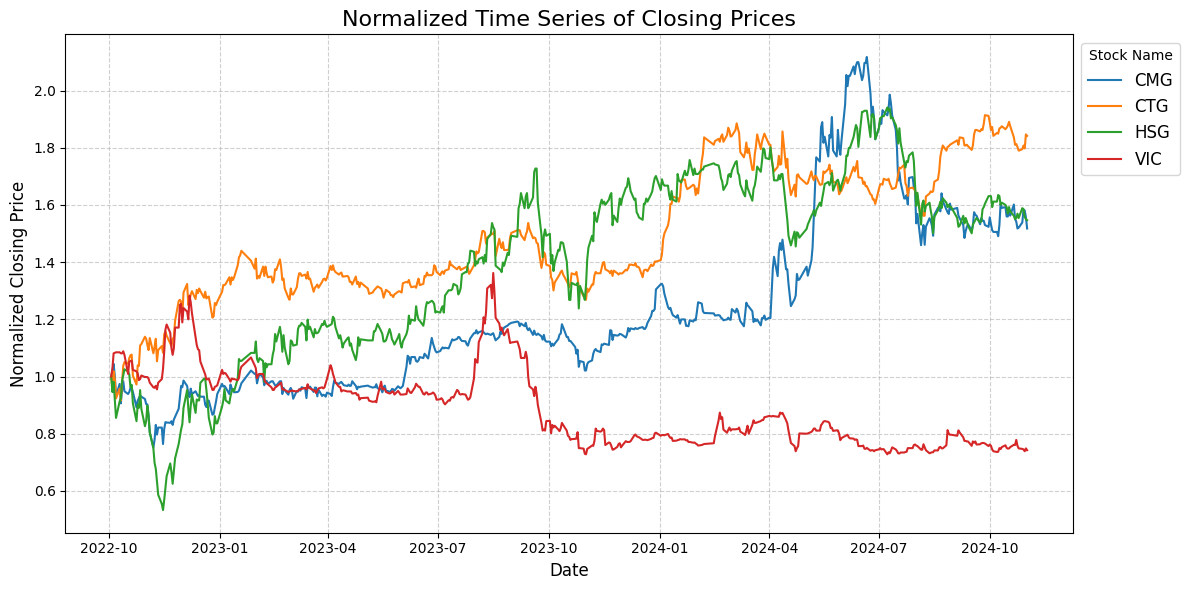

In [13]:

# Tạo Pivot Table để mỗi mã cổ phiếu là một cột
pivot_data = Stock_price_df.pivot(index='date', columns='stock_name', values='close')

# Chuẩn hóa dữ liệu để tất cả bắt đầu từ 1
pivot_data_normalized = pivot_data / pivot_data.iloc[0]

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))  # Kích thước biểu đồ

for column in pivot_data_normalized.columns:
    plt.plot(pivot_data_normalized.index, pivot_data_normalized[column], label=column)

# Thêm tiêu đề và nhãn
plt.title('Normalized Time Series of Closing Prices', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Normalized Closing Price', fontsize=12)

# Đặt chú thích ra ngoài biểu đồ
plt.legend(title='Stock Name', bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)

# Thêm lưới
plt.grid(True, linestyle='--', alpha=0.6)

# Điều chỉnh khoảng cách để không bị tràn
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()


###**Phân tích biến động**

Tính toán và so sánh độ biến động (độ lệch chuẩn) của giá đóng cửa cho từng cổ phiếu. Nó sẽ cung cấp cho chúng ta cái nhìn sâu sắc về mức độ giá cổ phiếu biến động trong suốt thời gian:

In [14]:
volatility = pivot_data.std().sort_values(ascending=False)

fig = px.bar(volatility,
             x=volatility.index,
             y=volatility.values,
             labels={'y': 'Standard Deviation', 'x': 'stock_name'},
             title='Volatility of Closing Prices (Standard Deviation)',
             color_discrete_sequence=['#00b4d8']
            )

fig.show()

CMG có độ biến động cao nhất, với độ lệch chuẩn vượt quá 10370.95, cho thấy giá của CMG biến động nhiều hơn so với các mã khác. Điều này có thể phản ánh rủi ro cao hơn nhưng cũng đi kèm với tiềm năng lợi nhuận cao hơn.

VIC có độ biến động xếp thứ hai, với độ lệch chuẩn khoảng 7417.10. Điều này cho thấy giá cổ phiếu VIC cũng biến động mạnh, mặc dù thấp hơn CMG. Độ biến động thấp hơn của CTG và HSG:

CTG và HSG có độ lệch chuẩn thấp hơn đáng kể, cho thấy giá cổ phiếu của hai mã này ít biến động hơn. Điều này phù hợp cho các nhà đầu tư ưa thích sự ổn định và rủi ro thấp.


###**Phân tích tương quan**

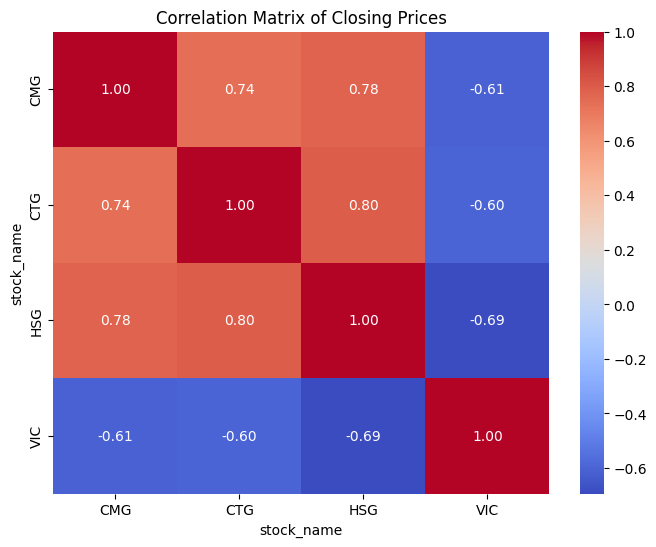

In [15]:
# Tạo ma trận tương quan cho close giữa các mã cổ phiếu
close = Stock_price_df.pivot(index='date', columns='stock_name',values='close')
correlation_matrix_close = close.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_close, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Closing Prices')
plt.show()

Biểu đồ nhiệt ở trên hiển thị ma trận tương quan của giá đóng cửa của bốn cổ phiếu (CMG,CTG,HSG,VIC).

•	Các giá trị gần +1 biểu thị mối tương quan tích cực mạnh, nghĩa là khi giá của một cổ phiếu tăng, cổ phiếu kia cũng có xu hướng tăng theo.

•	Các giá trị gần -1 biểu thị mối tương quan âm mạnh, trong đó mức tăng giá của một cổ phiếu tương ứng với mức giảm của cổ phiếu kia.

•	Giá trị gần 0 biểu thị sự thiếu tương quan.

Từ bản đồ nhiệt, chúng ta có thể quan sát thấy :

•	CMG và CTG có hệ số tương quan 0.74, cho thấy mối quan hệ tích cực và khá mạnh giữa hai mã cổ phiếu này.

•	Tương tự, CMG và HSG có hệ số tương quan là 0.78, trong khi CTG và HSG có hệ số tương quan là 0.80. Điều này cho thấy ba mã cổ phiếu này có xu hướng biến động cùng chiều khá cao. Các nhà đầu tư có thể nhận thấy rằng khi giá một trong các cổ phiếu này tăng, các cổ phiếu còn lại cũng có khả năng tăng.

•	VIC có mối tương quan âm với các cổ phiếu CMG (-0.61), CTG (-0.60), và HSG (-0.69). Điều này cho thấy VIC thường biến động ngược chiều với ba mã cổ phiếu còn lại. Khi giá của VIC tăng, các mã khác có khả năng giảm và ngược lại.Mối tương quan âm này có thể là dấu hiệu cho thấy VIC có các yếu tố tác động riêng biệt, hoặc có ngành kinh doanh và chu kỳ phát triển khác biệt so với ba mã kia

Kết luận:

Sự tương quan cao giữa CMG, CTG, và HSG có thể là dấu hiệu cho thấy các cổ phiếu này có khả năng bị ảnh hưởng bởi các yếu tố chung của thị trường hoặc ngành nghề. Điều này có thể giúp nhà đầu tư xây dựng chiến lược phòng ngừa rủi ro bằng cách phân bổ tài sản vào các mã có mối tương quan âm, như VIC, để giảm thiểu sự phụ thuộc vào xu hướng của nhóm cổ phiếu còn lại.


###**Phân tích so sánh**

Trong bước này, chúng ta sẽ so sánh hiệu suất của các cổ phiếu khác nhau dựa trên lợi nhuận của chúng trong suốt thời gian. Chúng ta sẽ tính toán phần trăm thay đổi trong giá đóng cửa từ đầu đến cuối thời gian cho mỗi cổ phiếu:

In [16]:
percentage_change = ((pivot_data.iloc[-1] - pivot_data.iloc[0]) / pivot_data.iloc[0]) * 100

fig = px.bar(percentage_change,
             x=percentage_change.index,
             y=percentage_change.values,
             labels={'y': 'Percentage Change (%)', 'x': 'Ticker'},
             title='Percentage Change in Closing Prices',
             color_discrete_sequence=['#fb8500'])

fig.show()

CMG là mã cổ phiếu có hiệu suất tốt nhất trong giai đoạn này, với mức tăng trưởng ấn tượng 73.66%.

CTG cũng thể hiện hiệu suất tốt, với mức tăng 71.24%. Mặc dù thấp hơn CMG một chút, nhưng CTG vẫn được xem là một mã cổ phiếu ổn định.

HSG có mức tăng trưởng ở mức trung bình, khoảng 40.88%. Hiệu suất này không nổi bật như CMG và CTG.

VIC là mã cổ phiếu duy nhất có sự thay đổi tiêu cực, với mức giảm đáng kể -26.93%. Điều này cho thấy giá cổ phiếu của công ty đã giảm đáng kể trong giai đoạn này.


In [17]:
Stock_price_df

Unnamed: 0       date   open   high    low  close   volume stock_name  \
0              0 2022-10-03  20310  20580  19330  19330  5690400        CTG   
1              1 2022-10-04  19690  20310  18350  18570  5635700        CTG   
2              2 2022-10-05  19060  19870  19060  19690  4275300        CTG   
3              3 2022-10-06  19690  19910  19020  19150  4256200        CTG   
4              4 2022-10-07  19060  19060  17850  17850  8381600        CTG   
...          ...        ...    ...    ...    ...    ...      ...        ...   
2083        2088 2024-10-28  41600  41750  41450  41450  1473100        VIC   
2084        2089 2024-10-29  41500  41700  41300  41350  1285000        VIC   
2085        2090 2024-10-30  41450  41700  40800  41000  2024200        VIC   
2086        2091 2024-10-31  41400  41700  41050  41550  1827900        VIC   
2087        2092 2024-11-01  41550  41600  41100  41200  1338600        VIC   

      %_change       change  year  quarter  month year_quarter  \
0     0.135307    31.168582  2022        4     10       2022Q4   
1    -3.930000  -760.000000  2022        4     10       2022Q4   
2     6.030000  1120.000000  2022        4     10       2022Q4   
3    -2.740000  -540.000000  2022        4     10       2022Q4   
4    -6.790000 -1300.000000  2022        4     10       2022Q4   
...        ...          ...   ...      ...    ...          ...   
2083 -0.240000  -100.000000  2024        4     10       2024Q4   
2084 -0.240000  -100.000000  2024        4     10       2024Q4   
2085 -0.850000  -350.000000  2024        4     10       2024Q4   
2086  1.340000   550.000000  2024        4     10       2024Q4   
2087 -0.840000  -350.000000  2024        4     11       2024Q4   

      quarterly_return  yearly_return  
0                  NaN            NaN  
1            -3.931712            NaN  
2             6.031233            NaN  
3            -2.742509            NaN  
4            -6.788512      -7.656492  
...                ...            ...  
2083         -0.240674      -1.777251  
2084         -0.241255      -4.282407  
2085         -0.846433      -2.497027  
2086          1.341463       0.000000  
2087         -0.842359      -0.603136  

[2088 rows x 16 columns]

In [18]:

# Calculate Moving Averages (MA)
def calculate_ma(data, window):
    return data['close'].rolling(window=window).mean()

# Calculate Relative Strength Index (RSI)
def calculate_rsi(data, period=14):
    delta = data['close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Calculate Moving Average Convergence Divergence (MACD)
def calculate_macd(data, fastperiod=12, slowperiod=26, signalperiod=9):
    ema_fast = data['close'].ewm(span=fastperiod, adjust=False).mean()
    ema_slow = data['close'].ewm(span=slowperiod, adjust=False).mean()
    macd = ema_fast - ema_slow
    signal = macd.ewm(span=signalperiod, adjust=False).mean()
    return macd, signal

# Apply technical indicators to stock data
for stock in Stock_price_df['stock_name'].unique():
    stock_data = Stock_price_df[Stock_price_df['stock_name'] == stock]

    # Calculate MA20 and MA50
    Stock_price_df.loc[Stock_price_df['stock_name'] == stock, 'MA20'] = calculate_ma(stock_data, 20)
    Stock_price_df.loc[Stock_price_df['stock_name'] == stock, 'MA50'] = calculate_ma(stock_data, 50)

    # Calculate RSI
    Stock_price_df.loc[Stock_price_df['stock_name'] == stock, 'RSI'] = calculate_rsi(stock_data)

    # Calculate MACD and Signal
    macd, signal = calculate_macd(stock_data)
    Stock_price_df.loc[Stock_price_df['stock_name'] == stock, 'MACD'] = macd
    Stock_price_df.loc[Stock_price_df['stock_name'] == stock, 'Signal'] = signal

# Apply trading signals and trend analysis (same as before)
for stock in Stock_price_df['stock_name'].unique():
    recent = Stock_price_df[Stock_price_df['stock_name'] == stock].iloc[-1]  # Lấy dữ liệu gần nhất
    signals = []

    # Kiểm tra MA
    if recent['MA20'] > recent['MA50']:
        signals.append("MA20 nằm trên MA50 (tín hiệu tích cực)")
        trend = "TĂNG"
    else:
        signals.append("MA20 nằm dưới MA50 (tín hiệu tiêu cực)")
        trend = "GIẢM"

    # Kiểm tra RSI
    if recent['RSI'] > 70:
        signals.append(f"RSI = {recent['RSI']:.2f} (thị trường quá mua)")
        if trend == "TĂNG":
            trend = "TĂNG NHƯNG CẦN THẬN TRỌNG"
    elif recent['RSI'] < 30:
        signals.append(f"RSI = {recent['RSI']:.2f} (thị trường quá bán)")
        if trend == "GIẢM":
            trend = "GIẢM NHƯNG CÓ CƠ HỘI"
    else:
        signals.append(f"RSI = {recent['RSI']:.2f} (trong vùng trung tính)")

    # Kiểm tra MACD
    if recent['MACD'] > recent['Signal']:
        signals.append("MACD nằm trên Signal (tín hiệu tích cực)")
        if trend == "GIẢM":
            trend = "XU HƯỚNG ĐANG CHUYỂN BIẾN"
    else:
        signals.append("MACD nằm dưới Signal (tín hiệu tiêu cực)")
        if trend == "TĂNG":
            trend = "XU HƯỚNG ĐANG CHUYỂN BIẾN"

    print(f"Cổ phiếu: {stock}")
    print("Tín hiệu:")
    for signal in signals:
        print(f"- {signal}")
    print(f"Xu hướng chung: {trend}\n")

Cổ phiếu: CTG
Tín hiệu:
- MA20 nằm trên MA50 (tín hiệu tích cực)
- RSI = 44.58 (trong vùng trung tính)
- MACD nằm dưới Signal (tín hiệu tiêu cực)
Xu hướng chung: XU HƯỚNG ĐANG CHUYỂN BIẾN

Cổ phiếu: HSG
Tín hiệu:
- MA20 nằm trên MA50 (tín hiệu tích cực)
- RSI = 37.04 (trong vùng trung tính)
- MACD nằm dưới Signal (tín hiệu tiêu cực)
Xu hướng chung: XU HƯỚNG ĐANG CHUYỂN BIẾN

Cổ phiếu: CMG
Tín hiệu:
- MA20 nằm trên MA50 (tín hiệu tích cực)
- RSI = 38.53 (trong vùng trung tính)
- MACD nằm dưới Signal (tín hiệu tiêu cực)
Xu hướng chung: XU HƯỚNG ĐANG CHUYỂN BIẾN

Cổ phiếu: VIC
Tín hiệu:
- MA20 nằm dưới MA50 (tín hiệu tiêu cực)
- RSI = 41.44 (trong vùng trung tính)
- MACD nằm dưới Signal (tín hiệu tiêu cực)
Xu hướng chung: GIẢM



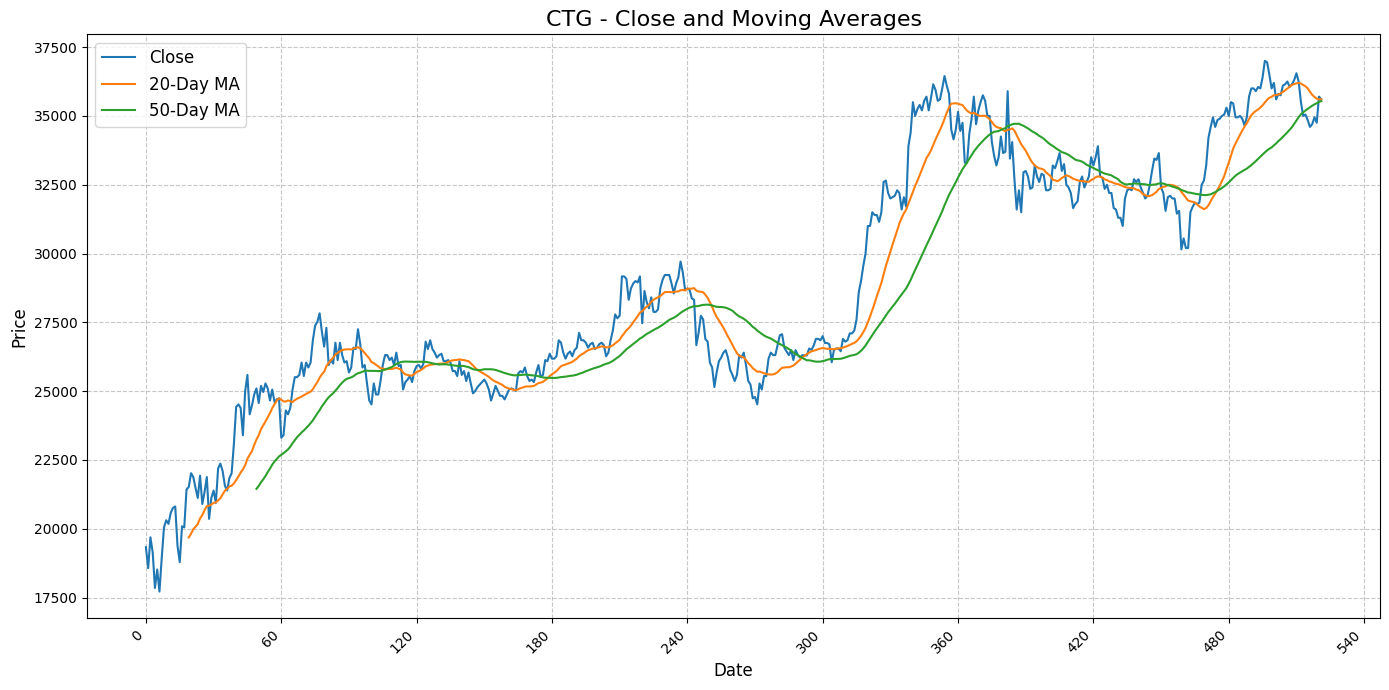

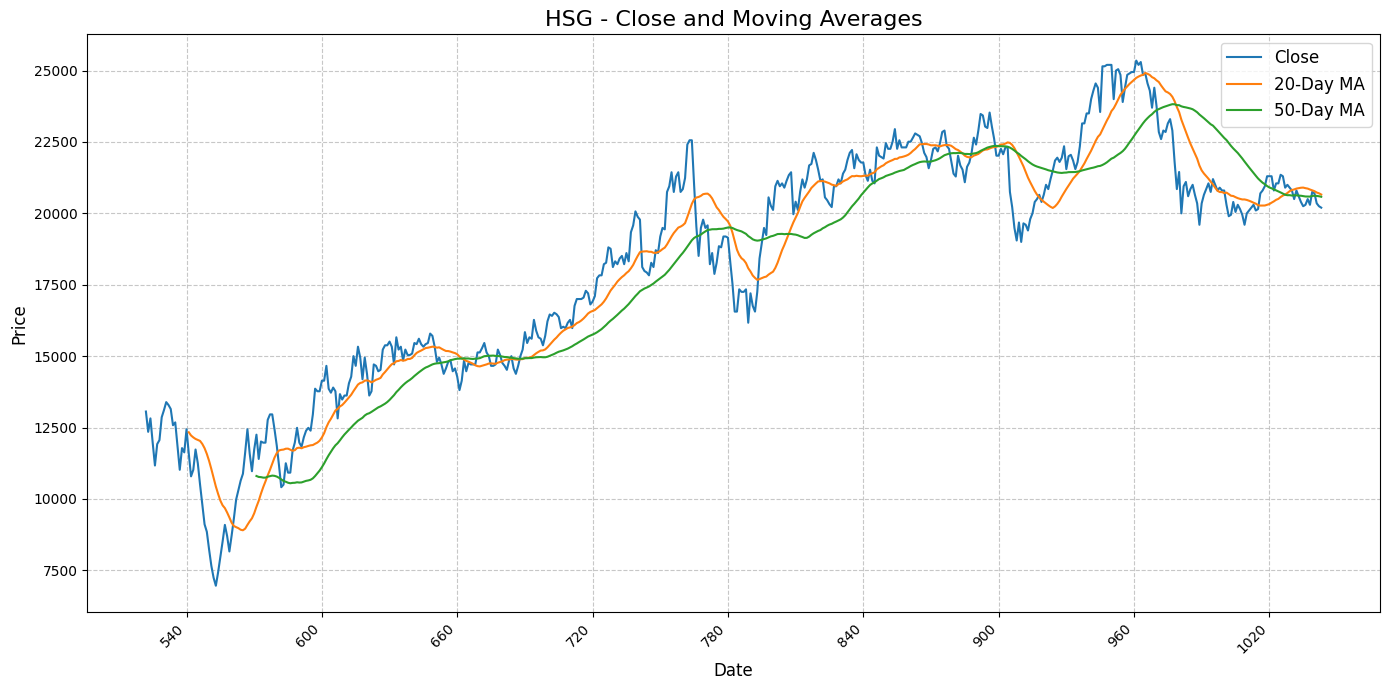

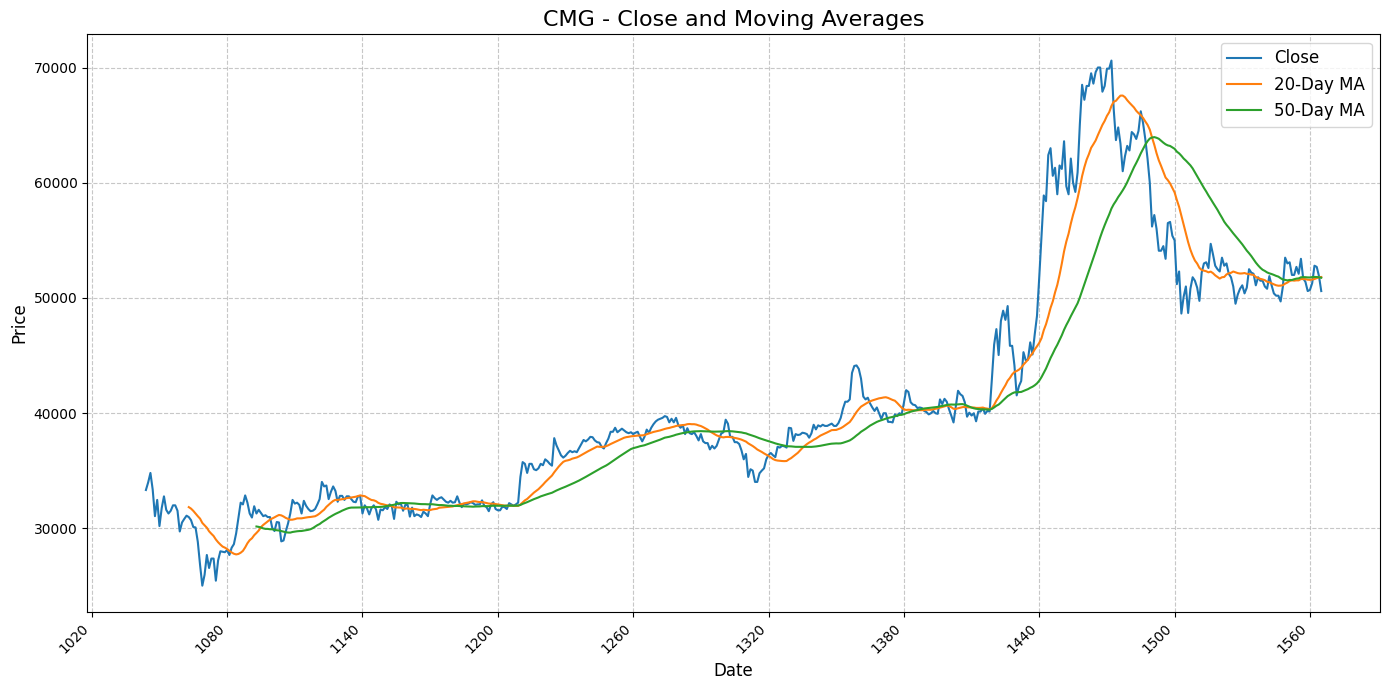

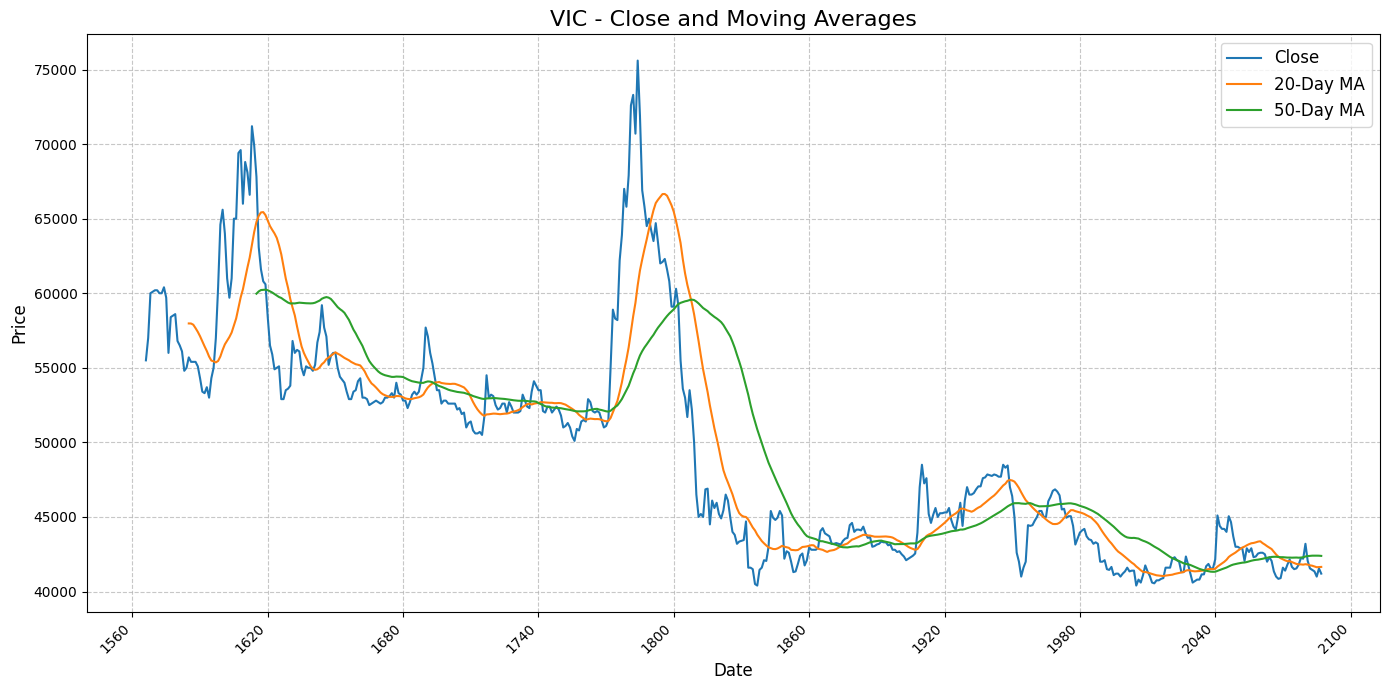

In [19]:

short_window = 20
long_window = 50

unique_tickers = Stock_price_df['stock_name'].unique()

for ticker in unique_tickers:
    ticker_data = Stock_price_df[Stock_price_df['stock_name'] == ticker].copy()
    ticker_data['20_MA'] = ticker_data['close'].rolling(window=short_window).mean()
    ticker_data['50_MA'] = ticker_data['close'].rolling(window=long_window).mean()

    plt.figure(figsize=(14, 7))
    plt.plot(ticker_data.index, ticker_data['close'], label='Close')
    plt.plot(ticker_data.index, ticker_data['20_MA'], label='20-Day MA')
    plt.plot(ticker_data.index, ticker_data['50_MA'], label='50-Day MA')
    plt.title(f'{ticker} - Close and Moving Averages', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Price', fontsize=12)
    plt.legend(fontsize=12)

    # Rotate and adjust x-axis ticks
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10)) # Limit number of ticks

    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

###**Phân tích đánh đổi rủi ro-lợi nhuận**

Để thực hiện Phân tích Rủi ro so với Lợi nhuận, chúng ta sẽ tính toán lợi nhuận trung bình hằng ngày và độ lệch chuẩn của lợi nhuận hằng ngày cho mỗi cổ phiếu. Độ lệch chuẩn sẽ đóng vai trò là đại diện cho rủi ro, trong khi lợi nhuận trung bình hằng ngày biểu thị lợi nhuận kỳ vọng.

Sau đó, chúng ta sẽ vẽ biểu đồ các giá trị này để đánh giá trực quan hồ sơ rủi ro-lợi nhuận của từng cổ phiếu. Các cổ phiếu có lợi nhuận trung bình cao hơn và rủi ro thấp hơn (độ lệch chuẩn) thường được mong muốn hơn, nhưng các quyết định đầu tư thường phụ thuộc vào khả năng chịu rủi ro của nhà đầu tư:

In [20]:
dailyreturns = pivot_data.pct_change().dropna()

avg_daily_return = dailyreturns.mean()
risk = dailyreturns.std()

risk_return_df = pd.DataFrame({'Risk': risk, 'Average Daily Return': avg_daily_return})

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=risk_return_df['Risk'],
    y=risk_return_df['Average Daily Return'],
    mode='markers+text',
    text=risk_return_df.index,
    textposition="top center",
    marker=dict(size=10)
))

fig.update_layout(
    title='Risk vs. Return Analysis',
    xaxis_title='Risk (Standard Deviation)',
    yaxis_title='Average Daily Return',
    showlegend=False,
)

fig.show()


- CTG cho thấy rủi ro thấp nhất kết hợp với lợi nhuận trung bình hàng ngày dương, cho thấy khoản đầu tư có khả năng sinh lời cao nhất và có tính biến động thấp nhất trong giai đoạn này.
- CMG có tính biến động cao hơn và trung bình lợi nhuận hàng ngày thấp hơn CTG, cho thấy khoản đầu tư ổn định với lợi nhuận nhất quán
- HSG cho thấy rủi ro cao nhất với mức lợi nhuận trung bình hằng ngày cao nhất, cho thấy khoản đầu tư có khả năng sinh lời cao hơn CMG và có tính biến động cao hơn so với CMG .
- VIC cho thấy rủi ro vừa phải và mức lợi nhuận trung bình hằng ngày âm, cho thấy đây là khoản đầu tư biến động vừa phải và ít sinh lời nhất trong số các cổ phiếu này trong giai đoạn được phân tích.

Nhận xét:
* CMG

Biến động Mạnh: Biểu đồ cho thấy mức độ biến động lớn trong tăng trưởng quý của cổ phiếu CMG, đặc biệt là sự tăng trưởng đột biến vào quý 2 năm 2024 và sự giảm mạnh vào quý 3 năm 2024.

Giai đoạn Tăng Trưởng Mạnh: Quý 2 năm 2024 là giai đoạn tăng trưởng mạnh mẽ nhất, đạt tỷ lệ tăng trưởng trên 40%.

Giai đoạn Điều Chỉnh: Quý 3 năm 2024 cho thấy một giai đoạn điều chỉnh mạnh với mức giảm đáng kể.

Xu Hướng Hồi Phục: Sự hồi phục ở quý 4 năm 2024 cho thấy cổ phiếu CMG có khả năng hồi phục sau các giai đoạn giảm mạnh

* CTG
Biến động Lớn: Biểu đồ cho thấy mức độ biến động lớn trong tăng trưởng quý của cổ phiếu CTG, đặc biệt là sự tăng giảm đột ngột vào các quý 1 và quý 2 năm 2024.

Giai đoạn Tăng Trưởng Mạnh: Quý 4 năm 2022 và quý 1 năm 2024 là những giai đoạn tăng trưởng mạnh mẽ.

Giai đoạn Điều Chỉnh: Quý 2 năm 2024 thể hiện một giai đoạn điều chỉnh mạnh với mức giảm đáng kể.

Xu Hướng Hồi Phục: Sự hồi phục ở quý 3 năm 2024 cho thấy cổ phiếu CTG có khả năng hồi phục sau các giai đoạn giảm mạnh.


* HSG

Biến động Lớn: Biểu đồ cho thấy mức độ biến động lớn trong tăng trưởng quý của cổ phiếu HSG, đặc biệt là sự tăng giảm mạnh trong các quý của năm 2024.

Giai đoạn Tăng Trưởng Mạnh: Quý 1 năm 2023 là giai đoạn tăng trưởng mạnh mẽ nhất với mức tăng khoảng 35%.

Giai đoạn Điều Chỉnh: Quý 3 năm 2024 thể hiện một giai đoạn điều chỉnh mạnh với mức giảm đáng kể.

Xu Hướng Hồi Phục: Sự hồi phục nhẹ ở quý 4 năm 2024 cho thấy cổ phiếu HSG có khả năng hồi phục sau các giai đoạn giảm mạnh.

* VIC

Biến động Mạnh: Biểu đồ cho thấy mức độ biến động lớn trong tăng trưởng quý của cổ phiếu VIC, đặc biệt là sự tăng giảm mạnh trong các quý của năm 2024.

Giai đoạn Tăng Trưởng Mạnh: Quý 1 năm 2023 và quý 1 năm 2024 là những giai đoạn tăng trưởng mạnh mẽ nhất.

Giai đoạn Điều Chỉnh: Quý 2 năm 2023 và quý 2 năm 2024 thể hiện các giai đoạn điều chỉnh mạnh với mức giảm đáng kể.

Xu Hướng Hồi Phục: Sự hồi phục ở quý 3 năm 2023 và quý 3 năm 2024 c



# **3.DỰ ĐOÁN GIÁ CỔ PHIẾU**

### Lấy thêm dữ liệu để train mô hình

### Chia bộ dữ liệu và xử lý tập dữ liệu

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model


from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense


from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

from datetime import date, datetime
import pandas as pd
from datetime import date,datetime,timedelta

In [24]:
Stock_price_df = pd.read_csv(r"C:\Users\hsvie\Desktop\nckh\data\Stock_price_for_prediction.csv",index_col=0)

In [25]:
Stock_price_df.head()


date   open   high    low  close   volume stock_name  %_change  \
0  2017-11-03  12350  12520  12280  12520  1098240        CTG       NaN   
1  2017-11-06  12650  12950  12520  12950  2844000        CTG      3.43   
2  2017-11-07  12890  13190  12890  13020  3253350        CTG      0.54   
3  2017-11-08  12950  13350  12950  13290  4277710        CTG      2.07   
4  2017-11-09  13290  13320  13050  13150  1263570        CTG     -1.05   

   change  
0     NaN  
1   430.0  
2    70.0  
3   270.0  
4  -140.0

### **Xây dựng mô hình dự đoán giá**

In [26]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

def predict_price_model(stock_price_df, symbol, forecast_days=90, model_type='random_forest'):
    """
    Mô hình hóa dự đoán giá cho một cổ phiếu cụ thể

    Args:
        stock_price_df: DataFrame chứa dữ liệu giá cổ phiếu
        symbol: Mã cổ phiếu cần dự đoán
        forecast_days: Số ngày dự đoán trong tương lai
        model_type: Loại mô hình ('random_forest', 'xgboost', 'lstm')

    Returns:
        Dict chứa kết quả dự đoán
    """
    print(f"\nDỰ ĐOÁN GIÁ CỔ PHIẾU {symbol}")
    print("============================" + "=" * len(symbol))

    # Check if we have data for this symbol
    stock_data = stock_price_df[stock_price_df['stock_name'] == symbol].copy()
    if stock_data.empty:
        print(f" Không có dữ liệu cho cổ phiếu {symbol}")
        return None

    try:
        # Chuẩn bị dữ liệu
        print("Đang chuẩn bị dữ liệu...")
        df = stock_data.copy()

        # Chuyển đổi cột date thành đúng định dạng datetime nếu chưa đúng
        df['date'] = pd.to_datetime(df['date'])
        df = df.sort_values('date')  # Đảm bảo dữ liệu được sắp xếp theo thời gian

        # Tạo các features kỹ thuật
        df['MA5'] = df['close'].rolling(window=5).mean()
        df['MA20'] = df['close'].rolling(window=20).mean()
        df['MA50'] = df['close'].rolling(window=50).mean()

        # Tính RSI
        delta = df['close'].diff()
        gain = delta.where(delta > 0, 0)
        loss = -delta.where(delta < 0, 0)
        avg_gain = gain.rolling(window=14).mean()
        avg_loss = loss.rolling(window=14).mean()
        rs = avg_gain / avg_loss
        df['RSI'] = 100 - (100 / (1 + rs))

        # Tính MACD
        df['EMA12'] = df['close'].ewm(span=12, adjust=False).mean()
        df['EMA26'] = df['close'].ewm(span=26, adjust=False).mean()
        df['MACD'] = df['EMA12'] - df['EMA26']

        # Thêm độ biến động
        df['volatility'] = df['close'].rolling(window=10).std()

        # Thêm %_change và change từ dữ liệu gốc nếu chúng tồn tại
        if '%_change' in df.columns:
            df['pct_change'] = df['%_change']
        else:
            df['pct_change'] = df['close'].pct_change() * 100

        # Loại bỏ các dòng có NaN
        df = df.dropna()
        if df.empty:
            print(f" Không đủ dữ liệu cho cổ phiếu {symbol} sau khi tạo features")
            return None

        # Chuẩn bị features và target
        features = ['open', 'high', 'low', 'volume', 'MA5', 'MA20', 'MA50', 'RSI', 'MACD', 'volatility', 'pct_change']
        available_features = [f for f in features if f in df.columns]

        X = df[available_features].values
        y = df['close'].values

        # Chuẩn hóa dữ liệu
        X_scaler = MinMaxScaler()
        y_scaler = MinMaxScaler()

        X_scaled = X_scaler.fit_transform(X)
        y_scaled = y_scaler.fit_transform(y.reshape(-1, 1))

        # Chia dữ liệu
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, shuffle=False)

        # Xây dựng mô hình
        print(f"Đang huấn luyện mô hình {model_type}...")

        if model_type == 'random_forest':
            model = RandomForestRegressor(n_estimators=100, random_state=42)
            model.fit(X_train, y_train.ravel())

            # Đánh giá mô hình
            y_pred = model.predict(X_test)
            mse = mean_squared_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)
            # Chuyển đổi giá trị dự đoán về thang đo gốc
            y_pred = y_scaler.inverse_transform(np.array(y_pred).reshape(-1, 1)).flatten()

        elif model_type == 'xgboost':
            try:
                model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
                model.fit(X_train, y_train.ravel())

                # Đánh giá mô hình
                y_pred = model.predict(X_test)
                mse = mean_squared_error(y_test, y_pred)
                r2 = r2_score(y_test, y_pred)

                # Chuyển đổi giá trị dự đoán về thang đo gốc
                y_pred = y_scaler.inverse_transform(np.array(y_pred).reshape(-1, 1)).flatten()
            except ImportError:
                print("Thư viện XGBoost không được cài đặt. Đang sử dụng Random Forest thay thế.")
                model = RandomForestRegressor(n_estimators=100, random_state=42)
                model.fit(X_train, y_train.ravel())

                # Đánh giá mô hình
                y_pred = model.predict(X_test)
                mse = mean_squared_error(y_test, y_pred)
                r2 = r2_score(y_test, y_pred)

        elif model_type == 'lstm':
            try:
                # Chuẩn bị dữ liệu cho LSTM (chuỗi thời gian)
                def create_sequences(data, seq_length):
                    xs, ys = [], []
                    for i in range(len(data) - seq_length):
                        x = data[i:(i + seq_length)]
                        y = data[i + seq_length]
                        xs.append(x)
                        ys.append(y)
                    return np.array(xs), np.array(ys)

                seq_length = 10
                X_seq, y_seq = create_sequences(y_scaled, seq_length)

                # Chia dữ liệu
                train_size = int(len(X_seq) * 0.8)
                X_train, X_test = X_seq[:train_size], X_seq[train_size:]
                y_train, y_test = y_seq[:train_size], y_seq[train_size:]

                # Xây dựng mô hình LSTM
                model = Sequential()
                model.add(LSTM(50, return_sequences=True, input_shape=(seq_length, 1)))
                model.add(Dropout(0.2))
                model.add(LSTM(50, return_sequences=False))
                model.add(Dropout(0.2))
                model.add(Dense(1))

                model.compile(optimizer='adam', loss='mean_squared_error')
                model.fit(X_train, y_train, batch_size=32, epochs=50, verbose=0)

                # Đánh giá mô hình
                y_pred = model.predict(X_test)
                mse = mean_squared_error(y_test, y_pred)
                r2 = r2_score(y_test, y_pred)

                # Chuyển đổi giá trị dự đoán về thang đo gốc
                y_pred = y_scaler.inverse_transform(np.array(y_pred).reshape(-1, 1)).flatten()


                # Dự đoán
                # Tạo đoạn dữ liệu cuối cùng để dự đoán
                last_sequence = y_scaled[-seq_length:].reshape(1, seq_length, 1)

                # Dự đoán giá cho những ngày tiếp theo
                predictions = []
                current_sequence = last_sequence[0]

                for _ in range(forecast_days):
                    # Dự đoán ngày tiếp theo
                    next_day = model.predict(np.array([current_sequence]))
                    predictions.append(next_day[0, 0])

                    # Cập nhật chuỗi cho lần dự đoán tiếp theo
                    current_sequence = np.append(current_sequence[1:], next_day)
                    current_sequence = current_sequence.reshape(seq_length, 1)

                # Chuyển đổi giá trị dự đoán về thang đo gốc
                predicted_prices = y_scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()

            except ImportError:
                print(" Thư viện TensorFlow không được cài đặt. Đang sử dụng Random Forest thay thế.")
                model = RandomForestRegressor(n_estimators=100, random_state=42)
                model.fit(X_train, y_train.ravel())

                # Đánh giá mô hình
                y_pred = model.predict(X_test)
                mse = mean_squared_error(y_test, y_pred)
                r2 = r2_score(y_test, y_pred)

        else:
            print(f" Loại mô hình {model_type} không được hỗ trợ. Đang sử dụng Random Forest.")
            model = RandomForestRegressor(n_estimators=100, random_state=42)
            model.fit(X_train, y_train.ravel())

            # Đánh giá mô hình
            y_pred = model.predict(X_test)
            mse = mean_squared_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)

        # Dự đoán giá trong tương lai (trừ trường hợp LSTM đã xử lý ở trên)
        if model_type != 'lstm':
            # Chuẩn bị dữ liệu cho dự đoán tương lai
            last_record = df.iloc[-1]

            # Chuẩn bị feature cho dự đoán
            predictions = []
            latest_features = last_record[available_features].values.reshape(1, -1)
            latest_scaled = X_scaler.transform(latest_features)

            # Dự đoán cho forecast_days ngày tới
            for _ in range(forecast_days):
                # Dự đoán ngày tiếp theo
                next_pred_scaled = model.predict(latest_scaled.reshape(1, -1))
                next_pred = y_scaler.inverse_transform(next_pred_scaled.reshape(-1, 1))[0][0]
                predictions.append(next_pred)

                # Cập nhật features cho lần dự đoán tiếp theo (giả định đơn giản)
                # Trong thực tế, cần mô hình phức tạp hơn để dự đoán các features khác
                new_features = latest_features.copy()

                # Tìm chỉ số của các feature quan trọng nếu có
                open_idx = available_features.index('open') if 'open' in available_features else None
                high_idx = available_features.index('high') if 'high' in available_features else None
                low_idx = available_features.index('low') if 'low' in available_features else None

                # Cập nhật các giá trị
                if open_idx is not None:
                    new_features[0, open_idx] = next_pred  # Giả sử open = close của ngày trước
                if high_idx is not None:
                    new_features[0, high_idx] = next_pred * 1.02  # Giả sử high = 102% close
                if low_idx is not None:
                    new_features[0, low_idx] = next_pred * 0.98  # Giả sử low = 98% close

                # Cập nhật MA nếu có
                if 'MA5' in available_features:
                    ma5_idx = available_features.index('MA5')
                    new_features[0, ma5_idx] = (new_features[0, ma5_idx] * 4 + next_pred) / 5

                if 'MA20' in available_features:
                    ma20_idx = available_features.index('MA20')
                    new_features[0, ma20_idx] = (new_features[0, ma20_idx] * 19 + next_pred) / 20

                if 'MA50' in available_features:
                    ma50_idx = available_features.index('MA50')
                    new_features[0, ma50_idx] = (new_features[0, ma50_idx] * 49 + next_pred) / 50

                latest_features = new_features
                latest_scaled = X_scaler.transform(latest_features)

            predicted_prices = np.array(predictions)

        # Hiển thị kết quả
        print("\n KẾT QUẢ DỰ ĐOÁN")
        print(f"- MSE: {mse:.6f}")
        print(f"- R²: {r2*100:.2f}%")



       #  Lấy ngày tương ứng cho y_pred và y_test
        test_dates = df['date'].iloc[-len(y_test):]  # Lấy ngày từ df cho phần test
          # Vẽ biểu đồ so sánh
        plt.figure(figsize=(10, 6))
        plt.plot(test_dates, y_scaler.inverse_transform(y_test.reshape(-1, 1)), label='Giá thực tế', color='blue')
        plt.plot(test_dates,y_pred, label='Giá dự đoán', color='red')
        plt.title(f'So sánh giá dự đoán và giá thực tế ({model_type}) - {symbol}', fontsize=14)
        plt.xlabel('Thời gian', fontsize=12)
        plt.ylabel('Giá (VND)', fontsize=12)

        # Định dạng trục x để hiển thị ngày tháng
        import matplotlib.dates as mdates
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())

        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45, ha='right')  # Xoay nhãn trục x và căn chỉnh
        plt.tight_layout() # Điều chỉnh bố cục để tránh chồng chéo
        plt.show()


        latest_price = df['close'].iloc[-1]
        avg_pred_price = np.mean(predicted_prices)
        price_change = (avg_pred_price - latest_price) / latest_price

        print(f"\n Giá hiện tại của {symbol}: {latest_price:,.2f} VND")
        print(f" Giá trung bình dự đoán trong {forecast_days} ngày tới: {avg_pred_price:,.2f} VND")
        print(f" Mức thay đổi dự kiến: {price_change:.2%}")

        # Xác định xu hướng dự đoán
        if price_change > 0.05:
            trend = "TĂNG MẠNH"
        elif price_change > 0:
            trend = "TĂNG NHẸ"
        elif price_change > -0.05:
            trend = "GIẢM NHẸ"
        else:
            trend = "GIẢM MẠNH"

        print(f" Xu hướng dự đoán: {trend}")

        # Lưu kết quả
        prediction_result = {
            'symbol': symbol,
            'current_price': latest_price,
            'forecast_days': forecast_days,
            'predicted_prices': predicted_prices,
            'avg_predicted_price': avg_pred_price,
            'price_change_pct': price_change,
            'trend': trend,
            'model_accuracy': r2,
            'model_type': model_type,
            'dates': pd.date_range(start=df['date'].iloc[-1] + pd.Timedelta('1 days'), periods=forecast_days)
        }

        return prediction_result

    except Exception as e:
        print(f"Lỗi khi dự đoán giá cho cổ phiếu {symbol}: {str(e)}")
        import traceback
        traceback.print_exc()
        return None

def plot_prediction_results(prediction_result):
    """
    Vẽ biểu đồ kết quả dự đoán giá cổ phiếu

    Args:
        prediction_result: Dict chứa kết quả dự đoán từ hàm predict_price_model
    """
    if prediction_result is None:
        print("Không có kết quả dự đoán để vẽ biểu đồ")
        return

    symbol = prediction_result['symbol']
    forecast_days = prediction_result['forecast_days']
    predicted_prices = prediction_result['predicted_prices']
    current_price = prediction_result['current_price']
    dates = prediction_result['dates']

    plt.figure(figsize=(12, 6))

    # Vẽ đường giá hiện tại
    plt.axhline(y=current_price, color='r', linestyle='--', label='Giá hiện tại')

    # Vẽ dự đoán
    plt.plot(dates, predicted_prices, 'b-', label='Giá dự đoán')

    # Tính giá cao nhất và thấp nhất để tạo vùng tin cậy (đơn giản là ±5%)
    upper_bound = predicted_prices * 1.05
    lower_bound = predicted_prices * 0.95
    plt.fill_between(dates, lower_bound, upper_bound, color='blue', alpha=0.1, label='Vùng dao động')

    # Định dạng biểu đồ
    plt.title(f'Dự đoán giá cổ phiếu {symbol} trong {forecast_days} ngày tới', fontsize=15)
    plt.xlabel('Thời Gian', fontsize=12)
    plt.ylabel('Giá (VND)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()

    # Định dạng trục y với dấu phẩy làm dấu phân cách hàng nghìn
    from matplotlib.ticker import FuncFormatter
    plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

    # Xoay nhãn trục x để dễ đọc
    plt.xticks(rotation=45)
    plt.tight_layout()

    plt.show()

    # In thông tin xu hướng
    print(f"\n Tóm tắt dự đoán cho {symbol}:")
    print(f"- Giá hiện tại: {current_price:,.2f} VND")
    print(f"- Giá dự đoán (cuối kỳ): {predicted_prices[-1]:,.2f} VND")
    print(f"- Giá trung bình dự đoán: {np.mean(predicted_prices):,.2f} VND")
    print(f"- Giá cao nhất dự đoán: {np.max(predicted_prices):,.2f} VND")
    print(f"- Giá thấp nhất dự đoán: {np.min(predicted_prices):,.2f} VND")
    print(f"- Xu hướng: {prediction_result['trend']}")


Thông tin dữ liệu cổ phiếu:
- Số lượng mẫu: 6993
- Các mã cổ phiếu: ['CTG' 'HSG' 'CMG' 'VIC']
- Thời gian từ 2017-11-03 đến 2024-11-01

DỰ ĐOÁN GIÁ CỔ PHIẾU CTG
Đang chuẩn bị dữ liệu...
Đang huấn luyện mô hình random_forest...

 KẾT QUẢ DỰ ĐOÁN
- MSE: 0.000117
- R²: 99.40%


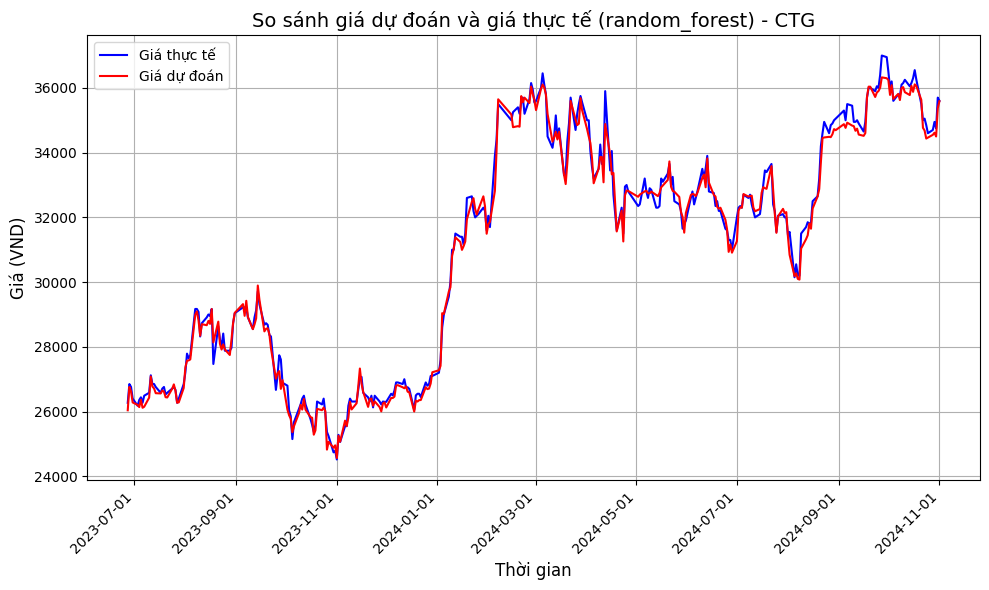


 Giá hiện tại của CTG: 35,600.00 VND
 Giá trung bình dự đoán trong 60 ngày tới: 35,301.06 VND
 Mức thay đổi dự kiến: -0.84%
 Xu hướng dự đoán: GIẢM NHẸ


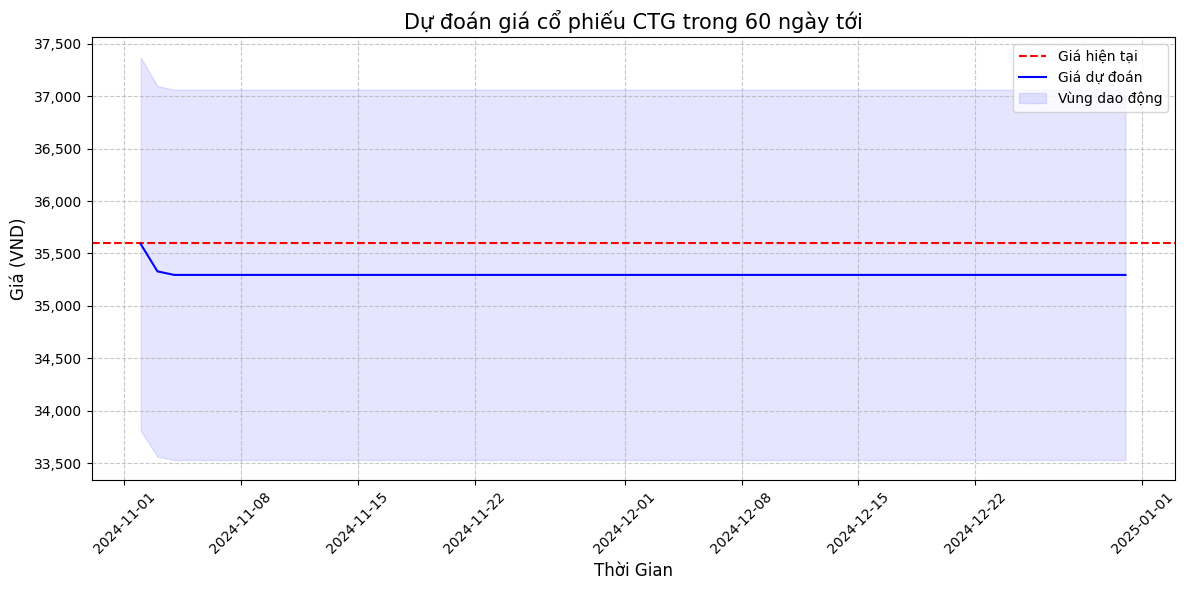


 Tóm tắt dự đoán cho CTG:
- Giá hiện tại: 35,600.00 VND
- Giá dự đoán (cuối kỳ): 35,295.60 VND
- Giá trung bình dự đoán: 35,301.06 VND
- Giá cao nhất dự đoán: 35,589.10 VND
- Giá thấp nhất dự đoán: 35,295.60 VND
- Xu hướng: GIẢM NHẸ


In [27]:
# In thông tin cơ bản về dữ liệu
print("Thông tin dữ liệu cổ phiếu:")
print(f"- Số lượng mẫu: {len(Stock_price_df)}")
print(f"- Các mã cổ phiếu: {Stock_price_df['stock_name'].unique()}")
print(f"- Thời gian từ {Stock_price_df['date'].min()} đến {Stock_price_df['date'].max()}")


# Sử dụng các mô hình khác nhau để dự đoán giá
# 1. Random Forest
rf_prediction = predict_price_model(Stock_price_df, 'CTG', forecast_days=60, model_type='random_forest')
plot_prediction_results(rf_prediction)


# # 2. XGBoost
# xgb_prediction = predict_price_model(Stock_price_df, 'CTG', forecast_days=60, model_type='xgboost')
# plot_prediction_results(xgb_prediction)


# # 3. LSTM
# lstm_prediction = predict_price_model(Stock_price_df, 'CTG', forecast_days=60, model_type='lstm')
# plot_prediction_results(lstm_prediction)


DỰ ĐOÁN GIÁ CỔ PHIẾU CTG
Đang chuẩn bị dữ liệu...
Đang huấn luyện mô hình xgboost...

 KẾT QUẢ DỰ ĐOÁN
- MSE: 0.000166
- R²: 99.16%


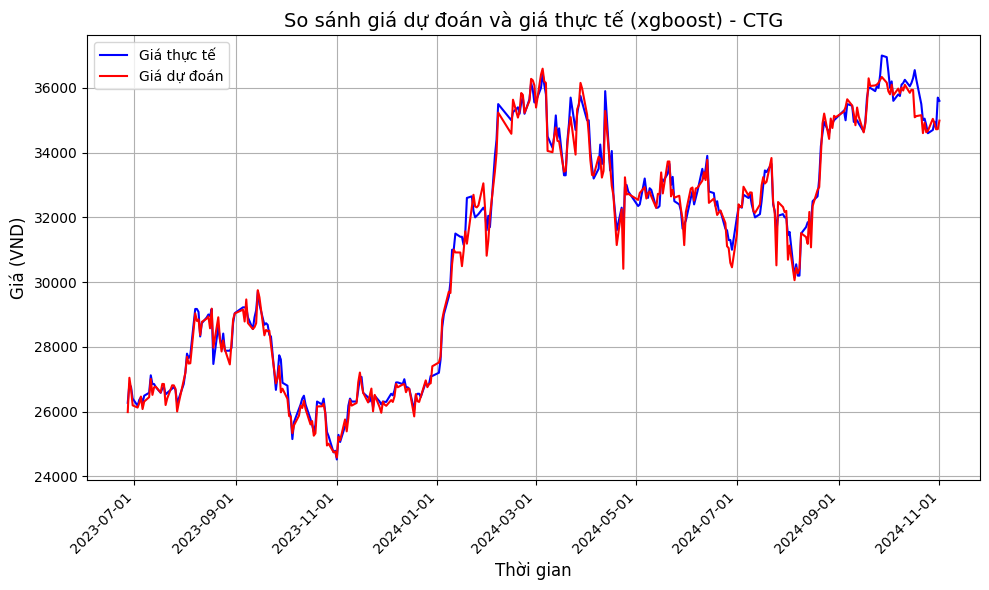


 Giá hiện tại của CTG: 35,600.00 VND
 Giá trung bình dự đoán trong 60 ngày tới: 34,173.33 VND
 Mức thay đổi dự kiến: -4.01%
 Xu hướng dự đoán: GIẢM NHẸ


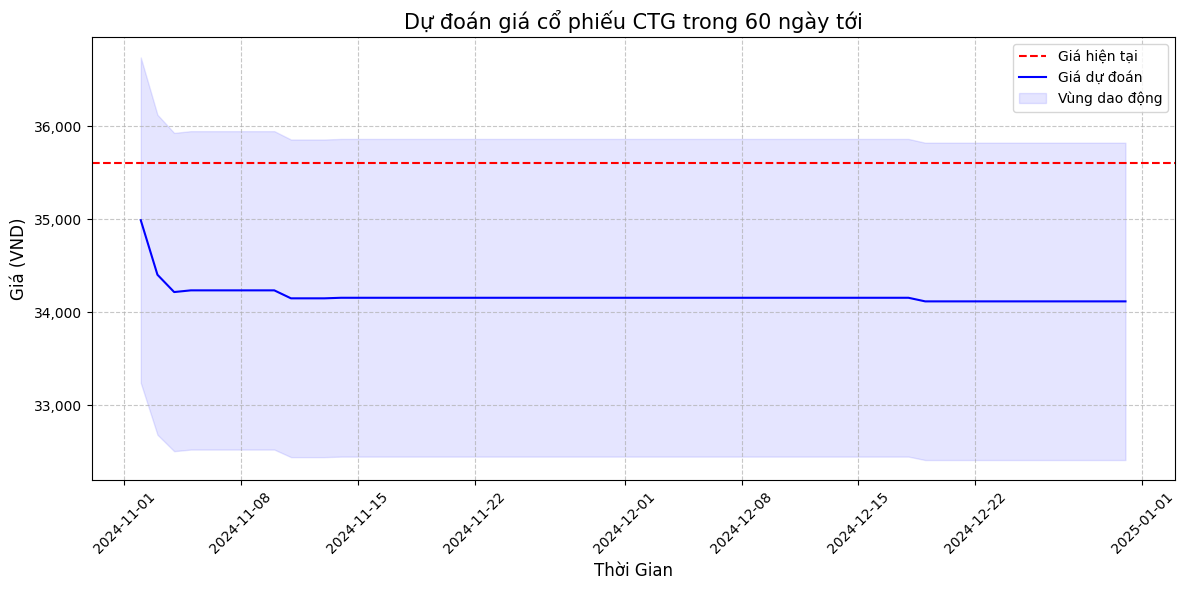


 Tóm tắt dự đoán cho CTG:
- Giá hiện tại: 35,600.00 VND
- Giá dự đoán (cuối kỳ): 34,116.31 VND
- Giá trung bình dự đoán: 34,173.33 VND
- Giá cao nhất dự đoán: 34,989.16 VND
- Giá thấp nhất dự đoán: 34,116.31 VND
- Xu hướng: GIẢM NHẸ


In [28]:
# # 2. XGBoost
xgb_prediction = predict_price_model(Stock_price_df, 'CTG', forecast_days=60, model_type='xgboost')
plot_prediction_results(xgb_prediction)


DỰ ĐOÁN GIÁ CỔ PHIẾU CTG
Đang chuẩn bị dữ liệu...
Đang huấn luyện mô hình lstm...


c:\Users\hsvie\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━

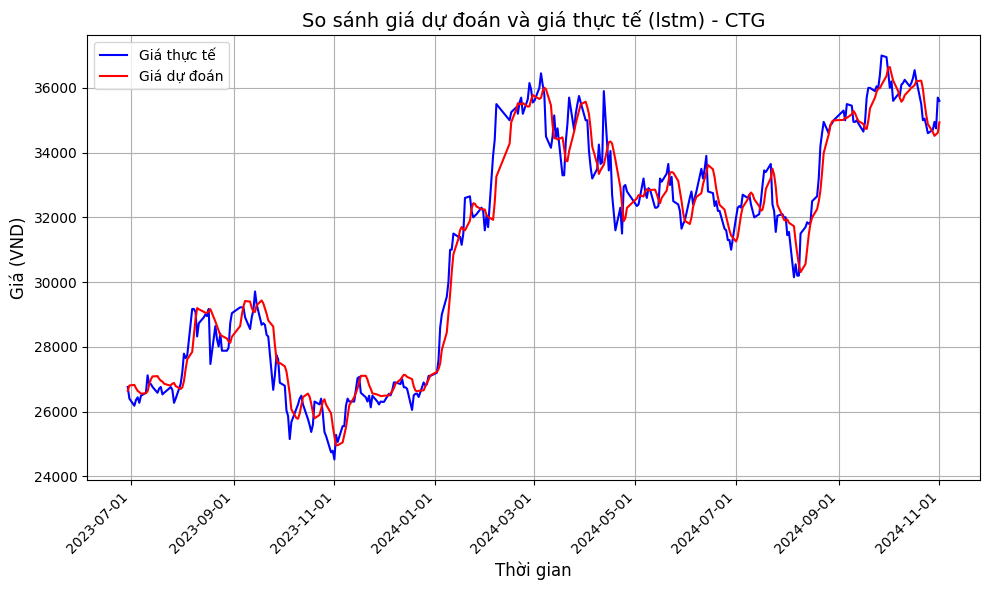


 Giá hiện tại của CTG: 35,600.00 VND
 Giá trung bình dự đoán trong 30 ngày tới: 34,875.27 VND
 Mức thay đổi dự kiến: -2.04%
 Xu hướng dự đoán: GIẢM NHẸ


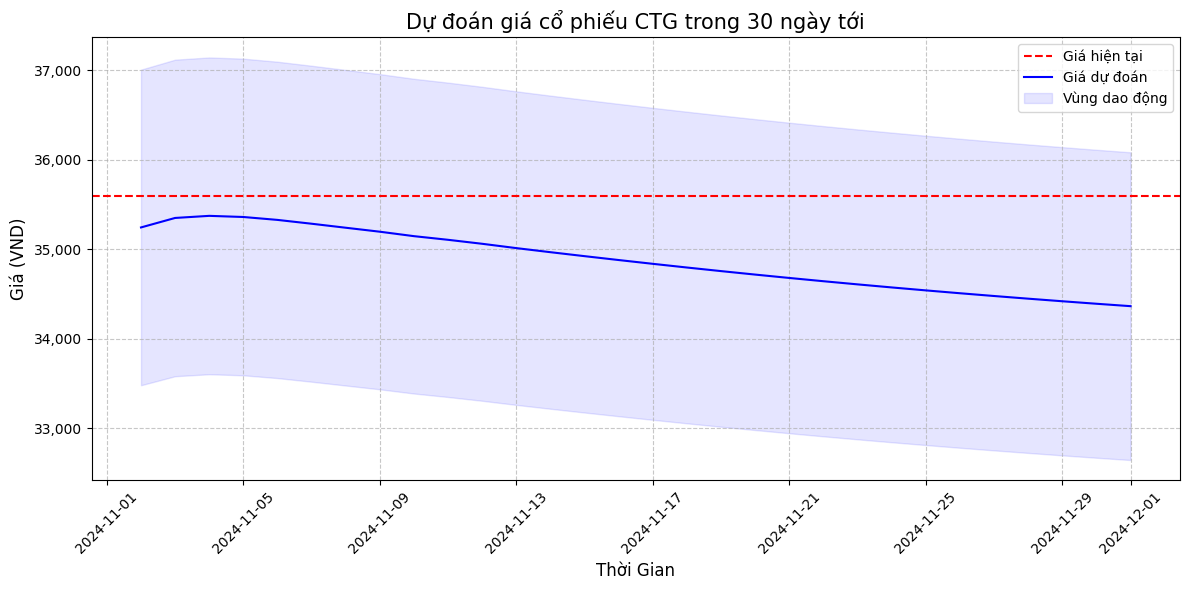


 Tóm tắt dự đoán cho CTG:
- Giá hiện tại: 35,600.00 VND
- Giá dự đoán (cuối kỳ): 34,365.38 VND
- Giá trung bình dự đoán: 34,875.27 VND
- Giá cao nhất dự đoán: 35,373.89 VND
- Giá thấp nhất dự đoán: 34,365.38 VND
- Xu hướng: GIẢM NHẸ


In [29]:
# 3. LSTM
lstm_prediction = predict_price_model(Stock_price_df, 'CTG', forecast_days=30, model_type='lstm')
lstm_prediction
plot_prediction_results(lstm_prediction)

# **4.TỐI ƯU HÓA DANH MỤC ĐẦU TƯ**

Tối ưu hóa danh mục đầu tư chứng khoán bao gồm phân tích xu hướng giá, tính toán lợi nhuận và biến động kỳ vọng, và xác định mối tương quan giữa các cổ phiếu khác nhau để đạt được sự đa dạng hóa. Sử dụng các kỹ thuật như Lý thuyết danh mục đầu tư hiện đại ( MPT ), chúng ta có thể xây dựng một danh mục đầu tư hiệu quả dựa trên biên giới hiệu quả để thể hiện sự đánh đổi tối ưu giữa rủi ro và lợi nhuận.

Kết quả mong đợi từ việc tối ưu hóa danh mục đầu tư thị trường chứng khoán bao gồm xác định danh mục đầu tư có tỷ lệ Sharpe cao nhất, cho thấy lợi nhuận điều chỉnh theo rủi ro tốt nhất và cung cấp chiến lược phân bổ rõ ràng cho các cổ phiếu được chọn để đạt được mục tiêu đầu tư dài hạn.

###**Lý thuyết danh mục đầu tư hiện đại (Modern Portfolio Theory - MPT)**

**Lợi nhuận kỳ vọng của danh mục** này sẽ được tính bởi
$$
R_p=w_A\cdot R_A + w_B\cdot R_B + w_C\cdot R_C.
$$

**Rủi ro của danh mục** này sẽ được tính bởi
$$
\sigma_p=\sqrt{w_A^2R_A^2 + w_B^2R_B^2 + w_C^2R_C^2 +2w_Aw_B\sigma_A\sigma_B\sigma_{AB} +2w_Aw_C\sigma_A\sigma_C\sigma_{AC} +2w_Bw_C\sigma_B\sigma_C\sigma_{BC}}.
$$

Rõ ràng với mỗi danh mục đầu tư $(w_A, w_B, w_C)$ sẽ cho tương ứng lợi nhuận kỳ vọng và rủi ro của danh mục này. Bài toán đặt ra là tìm được danh mục đầu tư tối ưu cho mỗi nhà đầu tư. Lý thuyết danh mục đầu tư hiện đại là một lời giải cho bài toán này.

Lý thuyết danh mục đầu tư hiện đại là một lý thuyết tài chính do Harry Markowitz phát triển vào những năm 1950, giúp các nhà đầu tư tối ưu hóa lợi nhuận và giảm rủi ro trong quá trình đầu tư. Dưới đây là một cách đơn giản để hiểu về lý thuyết này:

1. **Đầu tư không phải chỉ tập trung vào một tài sản:** Thay vì đặt hết tiền vào một cổ phiếu hay một loại tài sản nào đó, MPT khuyến khích bạn đa dạng hóa (phân chia đầu tư vào nhiều loại tài sản khác nhau). Điều này giúp giảm rủi ro, vì nếu một khoản đầu tư giảm giá, các khoản khác vẫn có thể giữ nguyên hoặc tăng giá.

2. **Tỷ lệ giữa rủi ro và lợi nhuận:** Theo MPT, mọi khoản đầu tư đều có hai yếu tố chính:

  * **Lợi nhuận dự kiến:** Đây là số tiền bạn mong đợi sẽ kiếm được từ khoản đầu tư.
  * **Rủi ro:** Đây là mức độ không chắc chắn về việc liệu bạn có đạt được lợi nhuận như mong muốn hay không.

  MPT giúp bạn xây dựng danh mục đầu tư sao cho tối đa hóa lợi nhuận mà không phải gánh chịu quá nhiều rủi ro. Bạn có thể chấp nhận rủi ro cao hơn nếu muốn có khả năng kiếm được lợi nhuận cao hơn, nhưng mục tiêu là tìm một điểm cân bằng tối ưu.

3. **Tương quan giữa các khoản đầu tư:** MPT cũng nhấn mạnh sự tương quan giữa các loại tài sản. Nếu hai khoản đầu tư có tương quan ngược chiều (khi một loại tăng, loại kia có xu hướng giảm), bạn có thể giảm rủi ro chung của danh mục. Điều này giúp đảm bảo rằng, ngay cả khi một loại tài sản giảm giá, danh mục tổng thể của bạn không bị ảnh hưởng quá nhiều.

4. **Đường biên hiệu quả (Efficient Frontier):** Đây là một đường biểu đồ cho thấy tập hợp các danh mục đầu tư tối ưu mà bạn có thể chọn dựa trên mức độ rủi ro và lợi nhuận mong muốn. Bất kỳ điểm nào trên đường này đại diện cho sự cân bằng tốt nhất giữa rủi ro và lợi nhuận. Nếu danh mục của bạn nằm dưới đường này, có nghĩa là bạn đang chấp nhận quá nhiều rủi ro so với lợi nhuận bạn có thể nhận được.

Lý thuyết danh mục đầu tư hiện đại (MPT) có những ưu điểm quan trọng, nhưng cũng tồn tại một số nhược điểm và hạn chế mà nhà đầu tư cần hiểu rõ:

1. Giả định dựa trên dữ liệu lịch sử không phải lúc nào cũng đúng
MPT dựa vào việc sử dụng dữ liệu lịch sử để dự đoán tương lai, bao gồm các yếu tố như lợi nhuận dự kiến, mức độ biến động (rủi ro) và tương quan giữa các tài sản. Tuy nhiên, hiệu suất trong quá khứ không phải lúc nào cũng phản ánh đúng tương lai. Những sự kiện bất ngờ như khủng hoảng tài chính, đại dịch, hay các biến động kinh tế lớn có thể làm thay đổi các xu hướng lịch sử này, khiến các giả định của MPT không còn chính xác.

2. Giả định rằng nhà đầu tư hành xử một cách hợp lý
MPT giả định rằng nhà đầu tư luôn hành xử hợp lý và có thể đánh giá chính xác rủi ro và lợi nhuận của danh mục đầu tư. Tuy nhiên, trong thực tế, con người có xu hướng bị chi phối bởi cảm xúc như lo sợ, lòng tham, hoặc tâm lý đám đông, và điều này có thể dẫn đến những quyết định đầu tư không tối ưu.

3. Tương quan tài sản có thể thay đổi
Một điểm quan trọng của MPT là giả định rằng mối tương quan giữa các tài sản là cố định, tức là nếu một tài sản tăng, tài sản khác sẽ giảm hoặc ngược lại. Tuy nhiên, trong nhiều trường hợp như khi xảy ra khủng hoảng kinh tế lớn, nhiều tài sản có thể cùng giảm giá mạnh, làm mất đi khả năng phòng vệ (hedging) của danh mục đầu tư. Điều này làm cho lý thuyết MPT kém hiệu quả trong điều kiện thị trường không ổn định.

4. Chỉ tập trung vào rủi ro và lợi nhuận
MPT chỉ tập trung vào việc tối ưu hóa lợi nhuận dự kiến và giảm thiểu rủi ro, nhưng lại bỏ qua một số yếu tố quan trọng khác. Ví dụ:

  Thanh khoản: Một số tài sản trong danh mục có thể khó mua bán khi cần thiết.
Yếu tố phi tài chính: Ví dụ như yếu tố môi trường, xã hội và quản trị (ESG), điều này ngày càng được quan tâm nhiều hơn trong đầu tư hiện đại.
Phí giao dịch và thuế: Những yếu tố này cũng không được MPT tính đến, nhưng lại có thể ảnh hưởng lớn đến lợi nhuận thực tế.
5. Rủi ro có thể không được đánh giá đúng mức
MPT sử dụng độ lệch chuẩn (standard deviation) để đo lường rủi ro, tức là mức độ biến động của lợi nhuận. Tuy nhiên, độ lệch chuẩn không phải lúc nào cũng phản ánh đúng bản chất của rủi ro. Một số loại rủi ro, chẳng hạn như rủi ro sự kiện cực đoan (black swan events), không thể được dự đoán hoặc đo lường bằng các công cụ thống kê thông thường.

6. Khó khăn trong việc ước lượng chính xác các yếu tố đầu vào
Để áp dụng MPT, nhà đầu tư cần có thông tin chính xác về lợi nhuận dự kiến, mức độ rủi ro, và tương quan giữa các tài sản. Tuy nhiên, dự đoán các yếu tố này rất khó khăn và không chính xác. Một sự thay đổi nhỏ trong dự đoán có thể dẫn đến thay đổi lớn trong danh mục tối ưu, gây ra rủi ro cho nhà đầu tư.

7. Không linh hoạt cho nhà đầu tư nhỏ lẻ
Để xây dựng một danh mục đầu tư đa dạng theo đúng nguyên tắc của MPT, nhà đầu tư có thể cần phải đầu tư vào nhiều loại tài sản khác nhau, điều này có thể khó khăn đối với các nhà đầu tư nhỏ lẻ. Họ có thể không có đủ vốn để đầu tư vào các loại tài sản đa dạng hoặc không có quyền truy cập vào những công cụ tài chính phức tạp mà nhà đầu tư lớn có thể sử dụng.

###**Đường biên hiệu quả (Efficient Frontier)**
Đường biên hiệu quả là một khái niệm trong tài chính, giúp các nhà đầu tư chọn ra những danh mục đầu tư tối ưu – nơi họ có thể đạt được lợi nhuận cao nhất cho một mức rủi ro nhất định, hoặc rủi ro thấp nhất cho mức lợi nhuận mong muốn. Những danh mục đầu tư nằm dưới đường biên hiệu quả không được coi là tối ưu, vì bạn có thể tìm được danh mục mang lại lợi nhuận tốt hơn với cùng mức rủi ro. Ngược lại, những danh mục nằm bên phải đường biên hiệu quả có mức rủi ro cao hơn và không đạt hiệu quả tương xứng với lợi nhuận mong đợi.

**Hiểu về Đường biên hiệu quả**

Đường biên hiệu quả xếp hạng các danh mục đầu tư dựa trên lợi nhuận kỳ vọng (trục y) và rủi ro (trục x). Rủi ro thường được đo bằng độ lệch chuẩn, đại diện cho sự biến động của lợi nhuận, trong khi lợi nhuận kỳ vọng có thể tính bằng tỷ lệ tăng trưởng hàng năm kép (CAGR). Lý thuyết này được phát triển bởi Harry Markowitz vào năm 1952, người đã sáng tạo ra Lý thuyết danh mục đầu tư hiện đại (MPT).

Trong điều kiện lý tưởng, nhà đầu tư muốn xây dựng danh mục gồm những tài sản mang lại lợi nhuận cao nhưng có rủi ro tổng thể thấp hơn khi so với các tài sản riêng lẻ. Khi các tài sản trong danh mục ít đồng bộ (tức có tương quan thấp), rủi ro chung sẽ giảm. Nếu thành công trong việc kết hợp các tài sản này, danh mục của bạn sẽ nằm trên đường biên hiệu quả.

**Lợi ích của việc đa dạng hóa**

Một ứng dụng quan trọng của đường biên hiệu quả là nó chỉ ra lợi ích của việc đa dạng hóa (phân tán đầu tư vào nhiều loại tài sản). Độ cong của đường biên hiệu quả giúp xác định xem việc đa dạng hóa có giúp giảm rủi ro và tăng lợi nhuận hay không. Điều này cũng cho thấy rằng, sau một điểm tối ưu nhất định, việc thêm rủi ro vào danh mục sẽ không mang lại lợi nhuận tương xứng.

Theo lý thuyết của Markowitz, mỗi nhà đầu tư có thể thiết kế một danh mục đầu tư tối ưu, cân bằng giữa lợi nhuận và rủi ro. Điều này không có nghĩa là chỉ đầu tư vào những tài sản có lợi nhuận cao nhất hoặc rủi ro thấp nhất, mà là phải tìm ra sự kết hợp hợp lý giữa các tài sản để đạt được sự cân bằng tối ưu giữa lợi nhuận và rủi ro.


Nếu bạn là một nhà đầu tư thích rủi ro, bạn có thể chọn các danh mục ở phía bên phải của đường biên hiệu quả, nơi có lợi nhuận cao nhưng rủi ro lớn. Ngược lại, nếu bạn không thích rủi ro, bạn có thể chọn các danh mục bên trái, nơi có lợi nhuận thấp nhưng rủi ro cũng nhỏ.

**Hạn chế của Đường biên hiệu quả**

Lý thuyết này cũng có một số giả định mà thực tế đôi khi không đúng:

* Lợi nhuận của tài sản được giả định có phân phối chuẩn (phân phối bình thường), nhưng thực tế thị trường có thể có những cú sốc hoặc sự kiện bất ngờ ngoài dự đoán.
* Markowitz giả định rằng các nhà đầu tư đều hành xử hợp lý và cố gắng tránh rủi ro, nhưng thực tế, nhiều nhà đầu tư có thể bị chi phối bởi cảm xúc, tâm lý đám đông hoặc sẵn sàng chấp nhận rủi ro lớn.
* Ngoài ra, lý thuyết này cũng giả định rằng nhà đầu tư có thể vay và cho vay tiền một cách tự do với lãi suất phi rủi ro, điều không phải lúc nào cũng thực tế.

###**Sharpe ratio**

Sharpe là một chỉ số đo lường mức lợi nhuận điều chỉnh theo rủi ro của một danh mục đầu tư hoặc một tài sản. Cụ thể, tỷ lệ Sharpe (Sharpe Ratio) được phát triển bởi nhà kinh tế học William F. Sharpe, giúp đánh giá mức độ lợi nhuận của một khoản đầu tư so với mức độ rủi ro mà nhà đầu tư phải chịu.

Công thức tính tỷ lệ Sharpe như sau:
$$
Sharpe \ Ratio =\frac{R_p-R_f}{\sigma_p},
$$
trong đó:
* $R_p$ là là lợi nhuận kỳ vọng của danh mục đầu tư;
* $R_f$ là lãi suất phi rủi ro (thường là lãi suất trái phiếu chính phủ);
* $\sigma_p$ là độ biến động (độ lệch chuẩn) của lợi nhuận danh mục đầu tư, thể hiện mức độ rủi ro.

Tỷ lệ Sharpe cao cho thấy danh mục đầu tư mang lại lợi nhuận cao hơn cho mỗi đơn vị rủi ro, trong khi tỷ lệ Sharpe thấp có thể cho thấy lợi nhuận không đủ hấp dẫn so với rủi ro. Nó là một công cụ quan trọng trong việc lựa chọn hoặc tối ưu hóa danh mục đầu tư, giúp các nhà đầu tư đánh giá hiệu suất dựa trên lợi nhuận điều chỉnh theo rủi ro.


**Ví dụ 3:**
 Giả sử bạn có một danh mục đầu tư với các thông số sau:

* Lợi nhuận kỳ vọng của danh mục đầu tư $R_p$: 12% mỗi năm
* Lãi suất phi rủi ro $R_f$: 3% (lãi suất trái phiếu chính phủ)
* Độ biến động của danh mục đầu tư $\sigma_p$: 10% (độ lệch chuẩn của lợi nhuận)

Tính tỷ lệ Sharpe:

Công thức tính tỷ lệ Sharpe như sau:
$$
Sharpe \ Ratio =\frac{R_p-R_f}{\sigma_p}=\frac{0.12-0.03}{0.10}=0.9.
$$

**Ý nghĩa của kết quả:** Tỷ lệ Sharpe của danh mục đầu tư này là 0.9, cho thấy mỗi đơn vị rủi ro (biến động) mà bạn chịu đựng mang lại mức lợi nhuận kỳ vọng là 0.9. Tỷ lệ này có thể được coi là tương đối tốt, nhưng không quá xuất sắc. Một tỷ lệ Sharpe lớn hơn 1 thường được coi là rất tốt, vì điều đó cho thấy lợi nhuận cao so với mức rủi ro.

###**Tối ưu hóa danh mục đầu tư**

In [32]:
Stock_info_df=pd.read_csv(r'C:\Users\hsvie\Desktop\nckh\data\Stock_info.csv',index_col = 0)
Stock_price_df=pd.read_csv(r'C:\Users\hsvie\Desktop\nckh\data\Stock_price.csv',index_col= 0)

In [33]:
Stock_info_df

stock_name                                       company_name  \
0        CTG  Ngân hàng Thương mại Cổ phần Công thương Việt Nam   
1        HSG                   Công ty Cổ phần Tập đoàn Hoa Sen   
2        CMG             Công ty Cổ phần Tập đoàn Công nghệ CMC   
3        VIC                     Tập đoàn Vingroup - Công ty CP   

   outstanding_share exchange    PE  industryPE   PB  industryPB  
0       5.370000e+09     HOSE   8.8         9.4  1.4         1.5  
1       6.210000e+08     HOSE  24.3        19.3  1.1         1.3  
2       1.904000e+08     HOSE  30.7        26.6  3.6         4.2  
3       3.823700e+09     HOSE  16.5        18.1  1.2         1.1

In [34]:
Stock_price_df

date   open   high    low  close   volume stock_name  %_change  \
0     2022-10-03  20310  20580  19330  19330  5690400        CTG  0.135307   
1     2022-10-04  19690  20310  18350  18570  5635700        CTG -3.930000   
2     2022-10-05  19060  19870  19060  19690  4275300        CTG  6.030000   
3     2022-10-06  19690  19910  19020  19150  4256200        CTG -2.740000   
4     2022-10-07  19060  19060  17850  17850  8381600        CTG -6.790000   
...          ...    ...    ...    ...    ...      ...        ...       ...   
2088  2024-10-28  41600  41750  41450  41450  1473100        VIC -0.240000   
2089  2024-10-29  41500  41700  41300  41350  1285000        VIC -0.240000   
2090  2024-10-30  41450  41700  40800  41000  2024200        VIC -0.850000   
2091  2024-10-31  41400  41700  41050  41550  1827900        VIC  1.340000   
2092  2024-11-01  41550  41600  41100  41200  1338600        VIC -0.840000   

           change  year  quarter  month  
0       31.168582  2022        4     10  
1     -760.000000  2022        4     10  
2     1120.000000  2022        4     10  
3     -540.000000  2022        4     10  
4    -1300.000000  2022        4     10  
...           ...   ...      ...    ...  
2088  -100.000000  2024        4     10  
2089  -100.000000  2024        4     10  
2090  -350.000000  2024        4     10  
2091   550.000000  2024        4     10  
2092  -350.000000  2024        4     11  

[2088 rows x 12 columns]

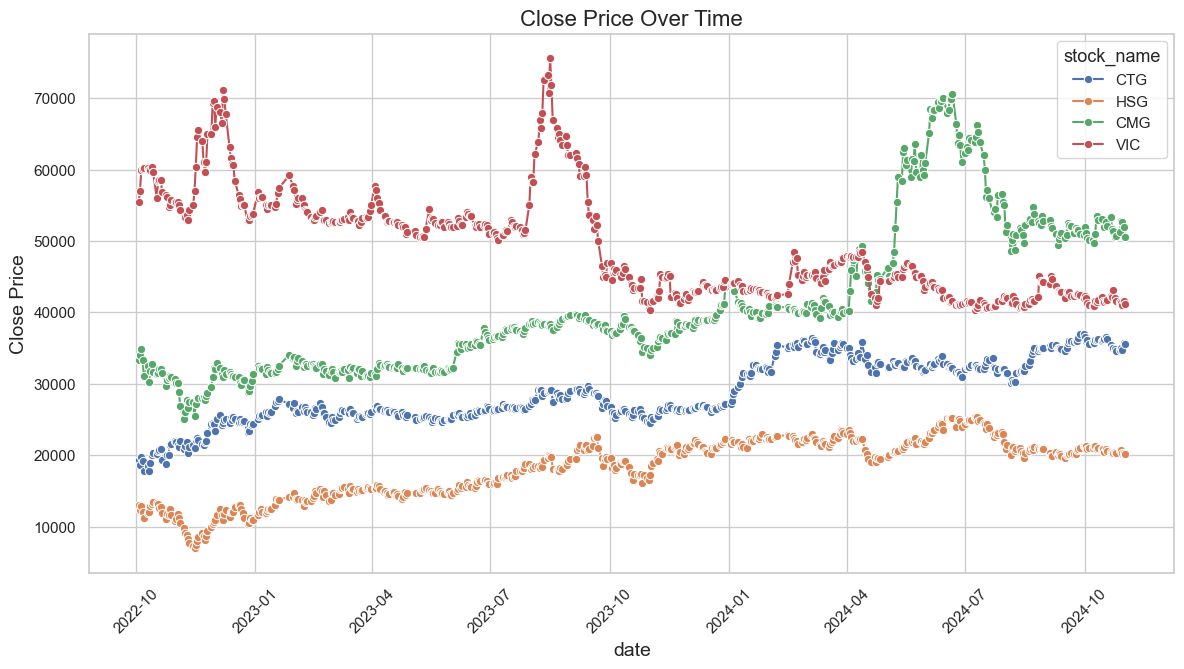

In [35]:
Stock_price_df['date'] = pd.to_datetime(Stock_price_df['date'])

Stock_price_df.set_index('date', inplace=True)
Stock_price_df.reset_index(inplace=True)
plt.figure(figsize=(14, 7))
sns.set(style='whitegrid')

sns.lineplot(data=Stock_price_df, x='date', y='close', hue='stock_name', marker='o')

plt.title('Close Price Over Time', fontsize=16)
plt.xlabel('date', fontsize=14)
plt.ylabel('Close Price', fontsize=14)
plt.legend(title='stock_name', title_fontsize='13', fontsize='11')
plt.grid(True)

plt.xticks(rotation=45)

plt.show()

* Cổ phiếu VIC:
    - Đây là cổ phiếu có giá cao nhất trong nhóm và có sự biến động lớn nhất.
    - Giá đóng cửa đạt đỉnh trong khoảng từ giữa năm 2023 đến cuối năm 2023, sau đó giảm mạnh vào đầu năm 2024. Điều này có thể liên quan đến các sự kiện kinh tế hoặc nội bộ công ty.
* Cổ phiếu CMG:
    - CMG có xu hướng tăng mạnh trong khoảng giữa năm 2023, đạt mức giá cao nhất so với các thời điểm khác, sau đó giảm nhẹ nhưng vẫn duy trì mức giá tương đối cao.
    - Đây là cổ phiếu có xu hướng phát triển tích cực trong năm qua, đặc biệt so với các cổ phiếu còn lại.
* Cổ phiếu CTG:

    - CTG có xu hướng ổn định hơn so với VIC và CMG. Mặc dù có sự dao động nhẹ, cổ phiếu này không có sự tăng hoặc giảm đột ngột.
    - Biến động giá thấp hơn cho thấy cổ phiếu này có thể phù hợp với các nhà đầu tư ưa thích sự ổn định.
* Cổ phiếu HSG:
    - HSG có mức giá thấp nhất trong nhóm và có xu hướng giảm nhẹ dần từ cuối năm 2023 đến đầu năm 2024.

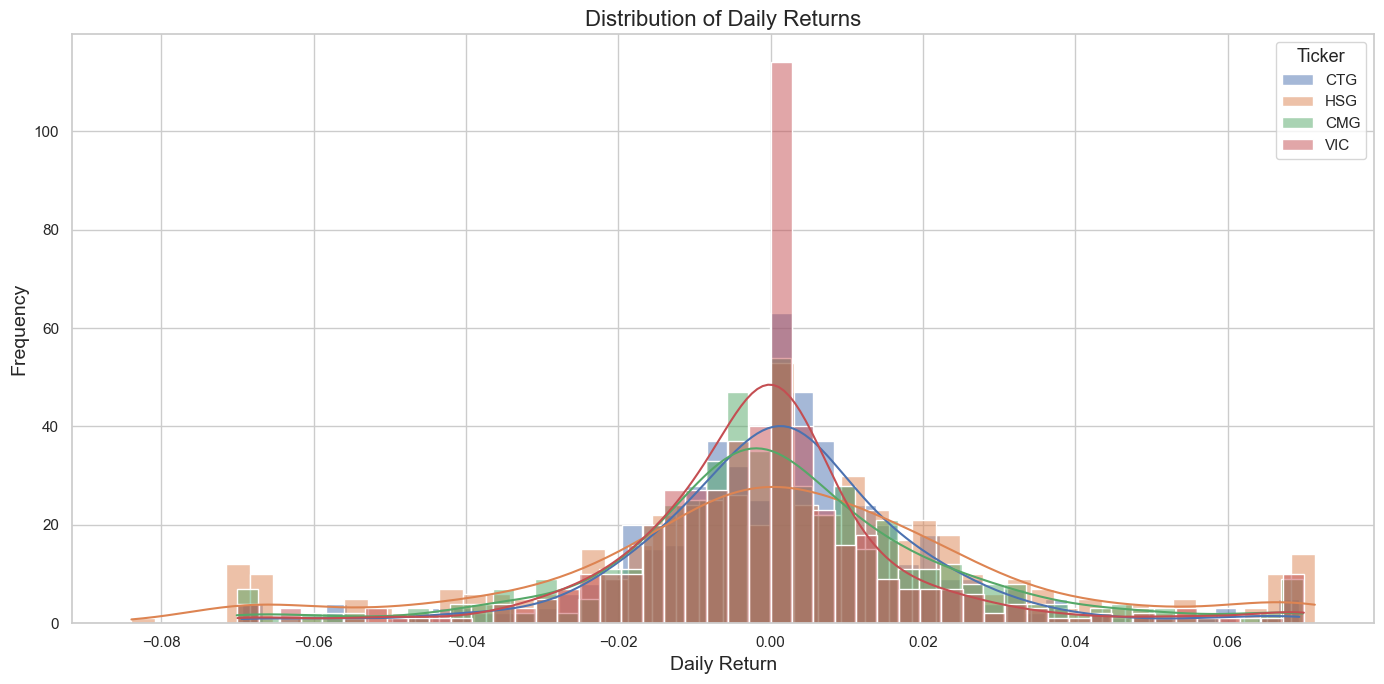

In [36]:
Stock_price_df['Daily Return'] = Stock_price_df.groupby('stock_name')['close'].pct_change()

plt.figure(figsize=(14, 7))
sns.set(style='whitegrid')
unique_tickers = Stock_price_df['stock_name'].unique()
for ticker in unique_tickers:
    ticker_data = Stock_price_df[Stock_price_df['stock_name'] == ticker]
    sns.histplot(ticker_data['Daily Return'].dropna(), bins=50, kde=True, label=ticker, alpha=0.5)

plt.title('Distribution of Daily Returns', fontsize=16)
plt.xlabel('Daily Return', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(title='Ticker', title_fontsize='13', fontsize='11')
plt.grid(True)
plt.tight_layout()
plt.show()

* văn bản in đậm Đặc điểm phân phối lợi nhuận:
    - Phân phối lợi nhuận của tất cả các cổ phiếu có dạng gần giống phân phối chuẩn, với giá trị lợi nhuận trung bình gần bằng 0. Điều này cho thấy đa phần lợi nhuận hàng ngày nằm ở mức thấp hoặc không có sự thay đổi lớn.
    - Tuy nhiên, có sự khác biệt về độ rộng và độ cao của phân phối giữa các cổ phiếu:
        - VIC: Phân phối cao nhất và tập trung mạnh ở giá trị trung bình, điều này chỉ ra rằng cổ phiếu VIC có lợi nhuận biến động thấp hơn so với các cổ phiếu khác.
        - HSG và CMG: Có đuôi dài hơn, chỉ ra rằng lợi nhuận hàng ngày của chúng có biên độ biến động lớn hơn, bao gồm cả các giá trị lợi nhuận cao và lỗ sâu.
        - CTG: Có sự phân phối khá cân bằng, với biến động ở mức trung bình so với các cổ phiếu khác.
* Biến động lợi nhuận (Risk):
  - HSG và CMG: Có mức độ biến động lớn hơn vì các đuôi của chúng kéo dài hơn về cả hai phía. Điều này cho thấy những cổ phiếu này có khả năng đem lại lợi nhuận cao, nhưng cũng tiềm ẩn rủi ro lớn hơn.
  - VIC: Có sự ổn định tương đối cao với lợi nhuận chủ yếu dao động gần mức trung bình. Đây có thể là cổ phiếu phù hợp với nhà đầu tư ưu tiên sự an toàn và ít rủi ro.
  - CTG: Duy trì sự cân đối giữa lợi nhuận và rủi ro, phù hợp với những nhà đầu tư thích mức rủi ro vừa phải.
* Tần suất các biến động cực đoan:
  - Các cổ phiếu như HSG và CMG có xu hướng xuất hiện nhiều biến động cực đoan hơn (các cột ở phần đuôi). Điều này có thể do đặc điểm ngành nghề hoặc các sự kiện ảnh hưởng trực tiếp đến các cổ phiếu này.
  - VIC và CTG ít xảy ra biến động cực đoan hơn, cho thấy chúng ít bị ảnh hưởng bởi các yếu tố bất ngờ hoặc ngẫu nhiên.


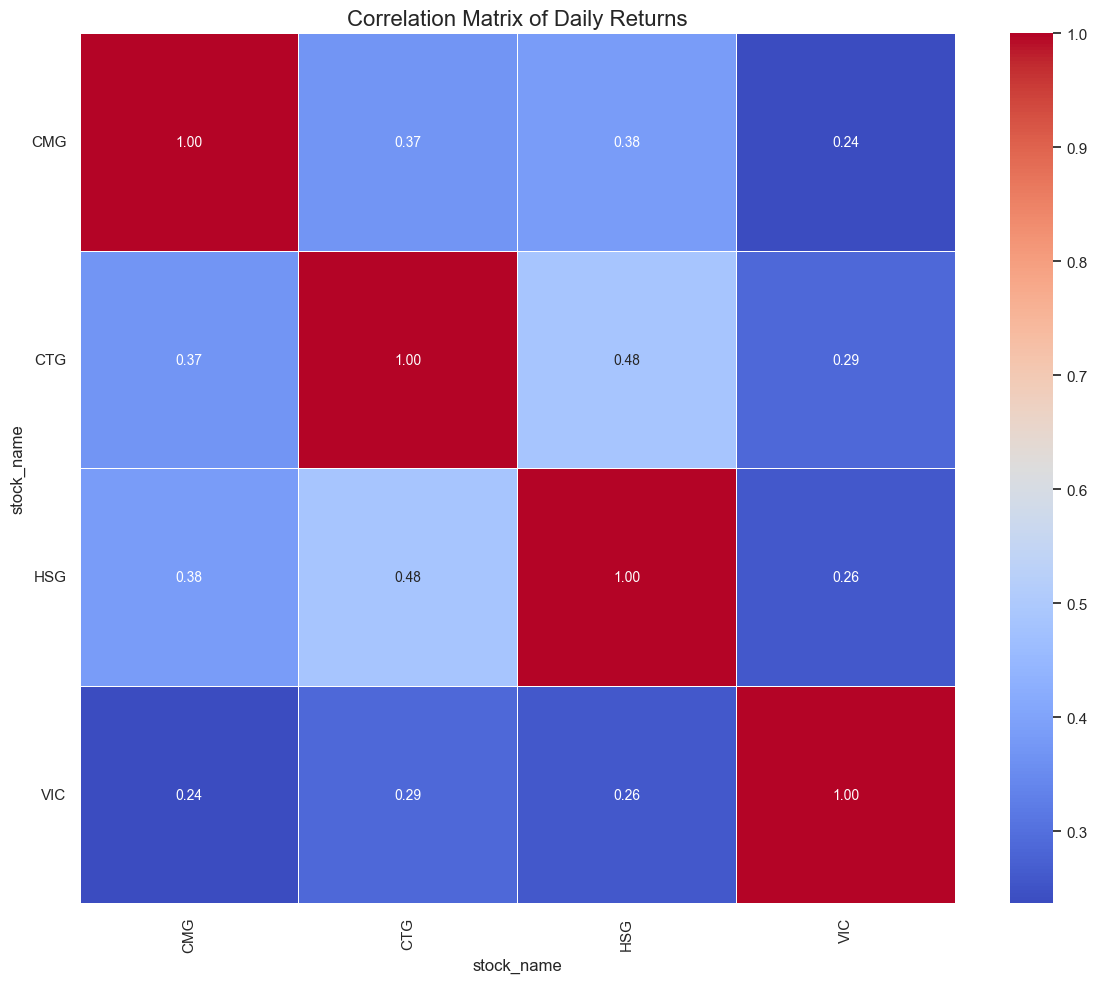

In [37]:
Stock_price_df['Daily Return'] = Stock_price_df.groupby('stock_name')['close'].pct_change()
daily_returns = Stock_price_df.pivot_table(index='date', columns='stock_name', values='Daily Return')

unique_tickers = daily_returns.columns.unique()

# Phân tích tương quan
correlation_matrix = daily_returns.corr()
plt.figure(figsize=(12, 10))
sns.set(style='whitegrid')

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, fmt='.2f', annot_kws={"size": 10})
plt.title('Correlation Matrix of Daily Returns', fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

*  Độ tương quan giữa các cổ phiếu:
    - HSG và CTG (0.48): Đây là cặp cổ phiếu có tương quan mạnh nhất trong nhóm. Điều này cho thấy hai cổ phiếu này có xu hướng biến động lợi nhuận hàng ngày cùng chiều trong một mức độ khá lớn.
    - CMG và VIC (0.24): Đây là cặp có tương quan yếu nhất, nghĩa là sự thay đổi lợi nhuận của một cổ phiếu ít ảnh hưởng đến cổ phiếu còn lại. Điều này có thể là do chúng thuộc các ngành nghề hoặc chịu ảnh hưởng từ các yếu tố khác nhau.
    - Các giá trị tương quan của VIC với CMG (0.24), CTG (0.29), và HSG (0.26) đều thấp. Điều này cho thấy cổ phiếu VIC có xu hướng biến động độc lập so với phần còn lại, làm giảm rủi ro nếu được đưa vào danh mục đầu tư cùng các cổ phiếu khác.
* Kết Luận :
    - CMG và VIC: Vì có tương quan rất thấp, việc đầu tư vào cả hai cổ phiếu này có thể giúp giảm rủi ro trong danh mục đầu tư, đặc biệt trong các giai đoạn thị trường biến động mạnh.
    - HSG và CTG: Mặc dù có tương quan cao hơn, hai cổ phiếu này có thể phù hợp nếu bạn muốn tận dụng lợi nhuận từ các xu hướng thị trường tương đồng

Bằng cách sử dụng Lý thuyết danh mục đầu tư hiện đại, chúng ta có thể xây dựng một danh mục đầu tư hiệu quả bằng cách cân bằng rủi ro và lợi nhuận. Chúng ta sẽ:

Tính toán lợi nhuận và biến động dự kiến ​​cho mỗi cổ phiếu.

Tạo một loạt danh mục đầu tư ngẫu nhiên để xác định ranh giới hiệu quả.

Tối ưu hóa danh mục đầu tư để tối đa hóa tỷ lệ Sharpe, đây là thước đo lợi nhuận được điều chỉnh theo rủi ro.



Tính toán lợi nhuận dự kiến ​​và mức biến động của từng cổ phiếu:

In [ ]:
# Tính toán chỉ số rủi ro và lợi nhuận cơ bản
expected_returns = daily_returns.mean() * 252 
volatility = daily_returns.std() * np.sqrt(252)  # Annualized

stock_stats = pd.DataFrame({
    'Expected Return': expected_returns,
    'Volatility': volatility
})
stock_stats

Expected Return  Volatility
stock_name                             
CMG                0.269746    0.369022
CTG                0.342469    0.306788
HSG                0.322197    0.471633
VIC               -0.093887    0.317934

* Hiệu suất của cổ phiếu:
    - CTG: Có lợi nhuận kỳ vọng cao nhất (0.342469), đồng thời độ biến động thấp nhất (0.3067) trong số các cổ phiếu. Đây là cổ phiếu hấp dẫn cho nhà đầu tư, vì nó vừa có lợi nhuận kỳ vọng tốt vừa ổn định.
    - HSG: Có lợi nhuận kỳ vọng tương đối cao (0.322197) nhưng độ biến động lớn nhất (0.47163). Điều này thể hiện HSG là cổ phiếu có rủi ro cao nhưng cũng có tiềm năng sinh lời đáng kể.
    - CMG: Có lợi nhuận kỳ vọng thấp hơn CTG và HSG (0.269746), nhưng độ biến động khá lớn (0.369022). Điều này cho thấy mức rủi ro không tương xứng hoàn toàn với lợi nhuận kỳ vọng.
    - VIC: Là cổ phiếu duy nhất có lợi nhuận kỳ vọng âm (-0.09388), mặc dù độ biến động tương đối thấp (0.317934). Đây là một tín hiệu cảnh báo, vì nhà đầu tư có thể đối mặt với rủi ro lỗ vốn khi đầu tư vào VIC.
* Phân tích lợi nhuận kỳ vọng so với độ biến động:
    - CTG nổi bật nhất trong việc tối ưu hóa lợi nhuận/rủi ro, khi có tỷ lệ lợi nhuận kỳ vọng/độ biến động cao (khoảng 1.1). Điều này khiến CTG phù hợp với nhà đầu tư thận trọng.
    - HSG có lợi nhuận kỳ vọng khá cao, nhưng rủi ro không cân đối, với tỷ lệ lợi nhuận kỳ vọng/độ biến động thấp (khoảng 0.64). Điều này phù hợp với nhà đầu tư mạo hiểm.
    - CMG nằm giữa, khi có lợi nhuận kỳ vọng và rủi ro ở mức trung bình. Tuy nhiên, mức độ rủi ro lại cao hơn so với lợi nhuận kỳ vọng, làm giảm tính hấp dẫn.
    - VIC có lợi nhuận kỳ vọng âm, khiến cổ phiếu này không phải là lựa chọn tốt, ngay cả đối với nhà đầu tư tìm kiếm sự ổn định.

In [39]:
market_returns = daily_returns.mean(axis=1)


# tinh Beta CHO MỖI cổ phiếu
betas = {}
market_variance = market_returns.var()

for stock in unique_tickers:
    stock_returns = daily_returns[stock]
    covariance = stock_returns.cov(market_returns)
    beta = covariance / market_variance
    betas[stock] = beta

# Convert to DataFrame
beta_df = pd.DataFrame(list(betas.items()), columns=['Ticker', 'Beta'])
beta_df.set_index('Ticker', inplace=True)


In [40]:
stock_stats = pd.DataFrame({
    'Lợi nhuận kỳ vọng': expected_returns,
    'Biến động': volatility,
    'Beta': pd.Series(betas)
})
print("Thống kê cổ phiếu với Beta:")
print(stock_stats)

Thống kê cổ phiếu với Beta:
     Lợi nhuận kỳ vọng  Biến động      Beta
CMG           0.269746   0.369022  0.990203
CTG           0.342469   0.306788  0.850935
HSG           0.322197   0.471633  1.447557
VIC          -0.093887   0.317934  0.711305


CTG:

Lợi nhuận kỳ vọng: 34.2469%

Độ biến động: 30.6788%


CTG có lợi nhuận kỳ vọng cao nhất trong danh mục với sự biến động thấp hơn so với CMG và HSG.tổng thể, CTG cho thấy khả năng mang lại lợi nhuận cao với rủi ro tương đối được kiểm soát. Đây có thể là lựa chọn hấp dẫn đối với những nhà đầu tư ưa chuộng sự cân bằng giữa lợi nhuận và rủi ro.

HSG:

Lợi nhuận kỳ vọng: 32.2197%

Độ biến động: 47.163%

HSG cho thấy tiềm năng lợi nhuận tốt nhưng đồng thời biến động cực kỳ cao, dẫn đến rủi ro lớn. Khoảng tin cậy rất rộng phản ánh sự không ổn định của kết quả đầu tư, khiến cho việc dự đoán lợi nhuận trở nên khó khăn hơn. Nhà đầu tư nếu cân nhắc HSG cần có khả năng chịu đựng rủi ro cao và tính toán cẩn trọng lẫn việc phân bổ danh mục.

VIC:

Lợi nhuận kỳ vọng: -9.3887%

Độ biến động: 31.79%


VIC có lợi nhuận kỳ vọng âm, cho thấy dự báo cho thấy khả năng thua lỗ. Mức độ biến động không quá thấp và khoảng tin cậy rộng càng làm tăng sự bất ổn của kết quả đầu tư. Điều này khiến VIC trông không hấp dẫn từ góc độ đầu tư, khi mà rủi ro thua lỗ rất cao và tiềm năng tăng trưởng dường như hạn chế.

CMG và HSG: Cả hai cổ phiếu đều mang lại lợi nhuận kỳ vọng khá cao, nhưng đồng thời cũng có độ biến động lớn, cho thấy mức rủi ro cao.

CTG: Với lợi nhuận kỳ vọng cao nhất kết hợp độ biến động thấp hơn, CTG tạo ra sự cân bằng tốt giữa cơ hội sinh lời và rủi ro. Điều này có thể khiến CTG trở thành lựa chọn ưu tiên trong danh mục đầu tư.

VIC: Lợi nhuận kỳ vọng âm và khoảng tin cậy rộng làm nổi bật rủi ro thua lỗ, khiến cổ phiếu này trở thành điểm yếu trong danh mục đầu tư. Nhà đầu tư có thể xem xét giảm hoặc loại bỏ VIC nếu mục tiêu là giảm thiểu rủi ro tổng thể.

In [41]:
#  Tính toán tỷ lệ Treynor
# Tỷ lệ Treynor = (Lợi nhuận kỳ vọng - Lãi suất phi rủi ro) / Beta
risk_free_rate = 0.01
treynor_ratios = (expected_returns - risk_free_rate) / pd.Series(betas)

# Add Treynor Ratio to stock_stats
stock_stats['Treynor Ratio'] = treynor_ratios


print(stock_stats)

     Lợi nhuận kỳ vọng  Biến động      Beta  Treynor Ratio
CMG           0.269746   0.369022  0.990203       0.262315
CTG           0.342469   0.306788  0.850935       0.390710
HSG           0.322197   0.471633  1.447557       0.215671
VIC          -0.093887   0.317934  0.711305      -0.146052


CMG
Tỷ lệ Treynor: 0.2623

Nhận xét: CMG có tỷ lệ Treynor ở mức khá tốt, cho thấy lợi nhuận tương đối phù hợp với mức độ rủi ro hệ thống của nó. Với Beta gần 1, cổ phiếu này có xu hướng dao động gần với thị trường chung.

CTG
Tỷ lệ Treynor: 0.3907 (cao nhất trong danh mục)

Nhận xét: CTG có tỷ lệ Treynor cao nhất, cho thấy lợi nhuận trên mỗi đơn vị rủi ro hệ thống là hấp dẫn nhất trong danh mục này. Với Beta thấp hơn CMG nhưng lợi nhuận kỳ vọng cao hơn, CTG tỏ ra là một lựa chọn tốt với mức độ rủi ro tương đối thấp.

HSG
Tỷ lệ Treynor: 0.2157 (thấp nhất trong các cổ phiếu có lợi nhuận kỳ vọng dương)

Nhận xét: Mặc dù HSG có lợi nhuận kỳ vọng khá cao, nhưng do Beta của nó lớn hơn 1.4, mức độ biến động cao khiến tỷ lệ Treynor thấp hơn so với các cổ phiếu khác. Điều này cho thấy rủi ro cao hơn nhưng không được bù đắp xứng đáng bởi lợi nhuận.

VIC
Tỷ lệ Treynor: -0.1460 (âm, cảnh báo rủi ro)

Nhận xét: VIC là cổ phiếu có tỷ lệ Treynor âm, nghĩa là lợi nhuận kỳ vọng của nó không đủ bù đắp mức độ rủi ro hệ thống. Điều này cho thấy cổ phiếu đang trong giai đoạn suy giảm hoặc không mang lại giá trị đầu tư hợp lý.

Chiến lược đề xuất:

Tăng tỷ trọng đầu tư vào CTG, vì nó có hiệu suất tốt nhất theo Treynor Ratio.

Duy trì CMG với tỷ trọng hợp lý, vì nó có tiềm năng nhưng độ biến động vẫn cao.

HSG chỉ nên đầu tư nếu bạn chịu được rủi ro lớn, tránh đặt quá nhiều kỳ vọng vào cổ phiếu này.

Giảm hoặc loại bỏ VIC, vì tỷ lệ Treynor âm phản ánh rủi ro cao với tiềm năng lợi nhuận thấp.


In [42]:
# Hàm tính hiệu suất danh mục đầu tư
def portfolio_performance(weights, returns, cov_matrix, risk_free_rate=0.01, betas=None, downside_deviation=None):
    # Các chỉ số cơ bản
    portfolio_return = np.dot(weights, returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility

    # # Tính Beta danh mục (trung bình có trọng số của các Beta riêng lẻ)
    if betas is not None:
        portfolio_beta = np.dot(weights, list(betas.values()))
        treynor_ratio = (portfolio_return - risk_free_rate) / portfolio_beta
    else:
        portfolio_beta = None
        treynor_ratio = None

    return {
        'return': portfolio_return,
        'volatility': portfolio_volatility,
        'sharpe': sharpe_ratio,
        'beta': portfolio_beta,
        'treynor': treynor_ratio
    }

In [43]:
# Mô phỏng Monte Carlo để tạo danh mục đầu tư ngẫu nhiên
# Số lượng danh mục đầu tư để mô phỏng
num_portfolios = 10000

# Ma trận hiệp phương sai hàng năm
cov_matrix = daily_returns.cov() * 252

# Mảng để lưu trữ kết quả
results = np.zeros((7, num_portfolios))   # Mở rộng để bao gồm các chỉ số mới

np.random.seed(42)

for i in range(num_portfolios):
    weights = np.random.random(len(unique_tickers))
    weights /= np.sum(weights)

    # Lấy các chỉ số hiệu suất
    perf = portfolio_performance(
        weights,
        expected_returns,
        cov_matrix,
        risk_free_rate=risk_free_rate,
        betas=betas
    )

    # Lưu kết quả
    results[0, i] = perf['return']                    # Lợi nhuận kỳ vọng
    results[1, i] = perf['volatility']               # Độ biến động
    results[2, i] = perf['sharpe']                   # Tỷ lệ Sharpe ratio
    results[3, i] = perf['beta'] if perf['beta'] is not None else 0  # Beta
    results[4, i] = perf['treynor'] if perf['treynor'] is not None else 0  # Treynor ratio
    results[6, i] = np.sum(weights)                   # Tổng trọng số (phải bằng 1)


Tạo danh mục đầu tư ngẫu nhiên và vẽ đường biên hiệu quả:

Tạo ra số lượng lớn danh mục đầu tư ngẫu nhiên.

Tính toán lợi nhuận và biến động dự kiến ​​cho mỗi danh mục đầu tư.

Vẽ biểu đồ các danh mục đầu tư này để hình dung đường biên hiệu quả

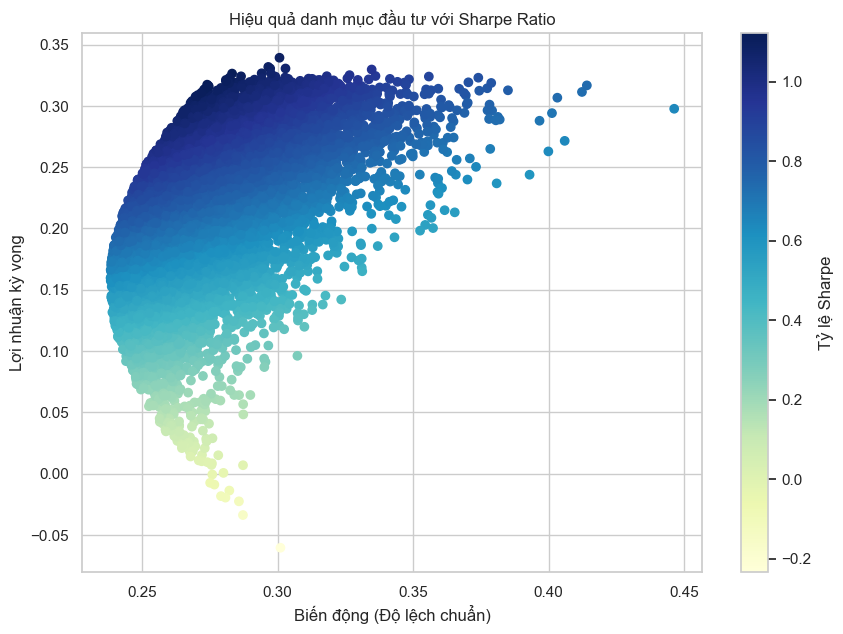

In [44]:
plt.figure(figsize=(10, 7))
plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='YlGnBu', marker='o')
plt.title('Hiệu quả danh mục đầu tư với Sharpe Ratio')
plt.xlabel('Biến động (Độ lệch chuẩn)')
plt.ylabel('Lợi nhuận kỳ vọng')
plt.colorbar(label='Tỷ lệ Sharpe')
plt.grid(True)
plt.show()

* Đường Efficient Frontier:
Biểu đồ minh họa một tập hợp danh mục đầu tư tối ưu hóa rủi ro và lợi nhuận. Các danh mục nằm trên phần đường biên cong (Efficient Frontier) là tối ưu, vì chúng cung cấp mức lợi nhuận cao nhất với mức rủi ro nhất định.
* Tập trung vào Sharpe Ratio:
Các điểm màu xanh đậm (Sharpe Ratio cao) nằm gần hoặc trên đường biên Efficient Frontier. Điều này cho thấy đây là các danh mục đầu tư mang lại lợi nhuận tốt nhất so với rủi ro.
* Khu vực không tối ưu:
Các điểm màu nhạt hơn (Sharpe Ratio thấp hơn), đặc biệt ở phía dưới bên trái hoặc bên phải của biểu đồ, biểu thị các danh mục có hiệu suất thấp hơn hoặc có mức độ rủi ro quá cao so với lợi nhuận.
* Tập trung đầu tư vào các danh mục mang lại tỷ lệ lợi nhuận/rủi ro tốt nhất (Sharpe Ratio cao).
* Cân bằng rủi ro và lợi nhuận:
Nếu bạn là nhà đầu tư chấp nhận rủi ro cao hơn để có lợi nhuận cao hơn, hãy chọn điểm ở phía bên phải của Frontier.Ngược lại, nếu bạn muốn giảm rủi ro, tập trung vào các điểm ở phía bên trái.

Mỗi chấm biểu thị một danh mục đầu tư, với màu sắc biểu thị tỷ lệ Sharpe, thước đo lợi nhuận điều chỉnh theo rủi ro. Các danh mục đầu tư ở rìa trái nhất của đường biên (gần trục y hơn) cung cấp lợi nhuận kỳ vọng cao nhất cho một mức độ biến động nhất định, biểu thị các danh mục đầu tư tối ưu. Độ dốc cho thấy các danh mục đầu tư có tỷ lệ Sharpe cao hơn (màu xanh đậm hơn) cung cấp lợi nhuận điều chỉnh theo rủi ro tốt hơn.

xác định danh mục đầu tư có tỷ lệ Sharpe tối đa:

In [45]:
# Tìm danh mục tối ưu với tỷ lệ Sharpe cao nhất
max_sharpe_idx = np.argmax(results[2])
max_sharpe_return = results[0, max_sharpe_idx]
max_sharpe_volatility = results[1, max_sharpe_idx]
max_sharpe_ratio = results[2, max_sharpe_idx]
max_sharpe_beta = results[3, max_sharpe_idx]
max_sharpe_treynor = results[4, max_sharpe_idx]


print("\nDanh mục đầu tư có tỷ lệ Sharpe tối đa:")
print(f"Return: {max_sharpe_return:.4f}")
print(f"Volatility: {max_sharpe_volatility:.4f}")
print(f"Sharpe Ratio: {max_sharpe_ratio:.4f}")
print(f"Beta: {max_sharpe_beta:.4f}")
print(f"Treynor Ratio: {max_sharpe_treynor:.4f}")


Danh mục đầu tư có tỷ lệ Sharpe tối đa:
Return: 0.3173
Volatility: 0.2739
Sharpe Ratio: 1.1219
Beta: 0.8931
Treynor Ratio: 0.3441


Danh mục này mang lại lợi nhuận ổn định với rủi ro được kiểm soát

  - Lợi nhuận kỳ vọng 31.73% là khá hấp dẫn so với thị trường.

  - Độ biến động 27.39% là tương đối ổn, không quá cao để gây lo ngại về mức độ dao động lớn.

  - Kết luận: Đây là một danh mục hiệu quả với sự cân bằng tốt giữa rủi ro và lợi nhuận.

Tỷ lệ Sharpe cao (1.1219)  Cho thấy mức sinh lời vượt trội so với rủi ro

  - Chỉ số Sharpe > 1 thường được coi là tốt trong đầu tư, cho thấy danh mục này có hiệu suất tốt trên mỗi đơn vị rủi ro.

  - So với các danh mục có độ biến động tương tự, danh mục này mang lại lợi nhuận cao hơn.

  - Kết luận: Đây là một lựa chọn tiềm năng cho những ai muốn tối đa hóa lợi nhuận mà vẫn kiểm soát rủi ro.

Beta thấp (0.8931)  Độ nhạy với thị trường không quá lớn

  - Beta thấp hơn 1 có nghĩa danh mục này ít bị ảnh hưởng bởi biến động chung của thị trường.

  - Trong trường hợp thị trường sụt giảm mạnh, danh mục này có thể giảm ít hơn so với chỉ số chung.

  - Kết luận: đây một danh mục không quá nhạy cảm với thị trường.

Tỷ lệ Treynor (0.3441)  Hiệu suất tốt trên rủi ro hệ thống

  - Treynor Ratio cho thấy mức lợi nhuận trên mỗi đơn vị rủi ro hệ thống (Beta).

  - Với 0.3441, danh mục này tạo ra lợi nhuận hợp lý so với rủi ro hệ thống nó phải chịu.

  - Kết luận: Danh mục có hiệu suất tốt khi đánh giá theo rủi ro hệ thống, Phù hợp với nhà đầu tư muốn tối đa hóa lợi nhuận nhưng vẫn kiểm soát mức độ dao động theo thị trường

In [46]:
# Tìm danh mục tối ưu với tỷ lệ Treynor cao nhất
max_treynor_idx = np.argmax(results[4])
max_treynor_return = results[0, max_treynor_idx]
max_treynor_volatility = results[1, max_treynor_idx]
max_treynor_sharpe = results[2, max_treynor_idx]
max_treynor_beta = results[3, max_treynor_idx]
max_treynor_ratio = results[4, max_treynor_idx]

print("\nDanh mục đầu tư có tỷ lệ Treynor tối đa:")
print(f"Return: {max_treynor_return:.4f}")
print(f"Volatility: {max_treynor_volatility:.4f}")
print(f"Sharpe Ratio: {max_treynor_sharpe:.4f}")
print(f"Beta: {max_treynor_beta:.4f}")
print(f"Treynor Ratio: {max_treynor_ratio:.4f}")


Danh mục đầu tư có tỷ lệ Treynor tối đa:
Return: 0.3393
Volatility: 0.3007
Sharpe Ratio: 1.0954
Beta: 0.8664
Treynor Ratio: 0.3801


Lợi nhuận kỳ vọng: 33.93%

  - Đây là mức lợi nhuận khá cao, tốt hơn danh mục tối ưu theo Sharpe (31.73%).

  - Điều này cho thấy danh mục có khả năng tạo lợi nhuận mạnh mẽ khi điều chỉnh theo rủi ro thị trường.

Độ biến động: 30.07%

  - Độ biến động này tương đối hợp lý, không quá cao để làm tăng rủi ro nhưng cũng không quá thấp để làm giảm khả năng sinh lời.

  - So với danh mục tối ưu theo Sharpe (27.39%), danh mục Treynor cao có rủi ro cao hơn nhưng đổi lại lợi nhuận cao hơn.

Tỷ lệ Sharpe: 1.0954

  - Dù danh mục này tối ưu theo Treynor, Sharpe Ratio vẫn ở mức tốt (>1), nghĩa là danh mục có hiệu suất lợi nhuận hợp lý so với mức độ biến động chung.

  - So với danh mục tối ưu Sharpe (Sharpe Ratio: 1.1219), danh mục này có một chút giảm nhưng vẫn giữ được mức ổn định.

Beta: 0.8664

  - Beta thấp hơn 1 nghĩa là danh mục này ít dao động theo thị trường hơn, giúp bảo vệ nhà đầu tư khỏi các biến động tiêu cực mạnh.

  - Danh mục tối ưu theo Sharpe có Beta 0.8931, tức danh mục Treynor này thậm chí còn ổn định hơn so với thị trường chung.

Tỷ lệ Treynor: 0.3801 (cao nhất trong danh mục thử nghiệm)

  - Điều này khẳng định danh mục này hoạt động rất tốt khi đánh giá theo rủi ro hệ thống.

  - Với mỗi đơn vị rủi ro hệ thống (Beta), danh mục này mang lại 38.01% lợi nhuận, đây là mức hiệu suất khá hấp dẫn.

  - Nhà đầu tư muốn tận dụng mức lợi nhuận cao nhất trên mỗi đơn vị rủi ro hệ thống nên ưu tiên danh mục này.

In [47]:
#  Tối ưu hóa chính xác với các ràng buộc
# Xác định hàm để có được trọng số tối ưu cho một mục tiêu tối ưu hóa nhất định
def get_optimal_weights(objective_function, data_args, init_guess):
    constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})
    bounds = tuple((0, 1) for asset in range(len(unique_tickers)))

    optimized_result = sco.minimize(
        objective_function,
        init_guess,
        args=data_args,
        method='SLSQP',
        bounds=bounds,
        constraints=constraints
    )

    return optimized_result['x']

# Các hàm mục tiêu cho các chiến lược tối ưu hóa khác nhau
def min_sharpe(weights, returns, cov_matrix, risk_free_rate):
    perf = portfolio_performance(weights, returns, cov_matrix, risk_free_rate)
    return -perf['sharpe']

def min_treynor(weights, returns, cov_matrix, risk_free_rate, betas):
    perf = portfolio_performance(weights, returns, cov_matrix, risk_free_rate, betas=betas)
    # Xử lý phép chia cho beta bằng không hoặc gần bằng không
    if abs(perf['beta']) < 1e-8:
        return 0  # hoặc một số âm lớn để tránh danh mục đầu tư này
    return -perf['treynor']

# Tìm trọng số tối ưu cho mỗi chiến lược
# Dự đoán ban đầu - trọng số bằng nhau
init_guess = np.array([1.0 / len(unique_tickers)] * len(unique_tickers))

# Nhận trọng số tối ưu cho từng chiến lược
sharpe_weights = get_optimal_weights(
    min_sharpe,
    (expected_returns, cov_matrix, risk_free_rate),
    init_guess
)

treynor_weights = get_optimal_weights(
    min_treynor,
    (expected_returns, cov_matrix, risk_free_rate, betas),
    init_guess
)

# Tạo DataFrames để hiển thị trọng số
sharpe_weights_df = pd.DataFrame({
    'Ticker': unique_tickers,
    'Weight': sharpe_weights
})

treynor_weights_df = pd.DataFrame({
    'Ticker': unique_tickers,
    'Weight': treynor_weights
})

print("\nTrọng số tối ưu danh mục đầu tư Sharp:")
print(sharpe_weights_df)

print("\nTrọng số tối ưu danh mục đầu tư Treynor:")
print(treynor_weights_df)


Trọng số tối ưu danh mục đầu tư Sharp:
  Ticker    Weight
0    CMG  0.220258
1    CTG  0.733137
2    HSG  0.046604
3    VIC  0.000000

Trọng số tối ưu danh mục đầu tư Treynor:
  Ticker        Weight
0    CMG  8.881784e-16
1    CTG  1.000000e+00
2    HSG  0.000000e+00
3    VIC  7.632783e-17


Danh mục tối ưu theo Sharpe
Tỷ trọng phân bổ:

  - CMG: 22.03%

  - CTG: 73.31%

  - HSG: 4.66%

  - VIC: Gần 0%

Nhận xét:

  - Danh mục này ưu tiên cân bằng giữa lợi nhuận và rủi ro tổng thể, chứ không tập trung hoàn toàn vào một mã cổ phiếu.

  - CTG có tỷ trọng lớn nhất (73.31%), phản ánh việc nó có hiệu suất rủi ro/lợi nhuận tổng thể tốt nhất.

  - CMG cũng có một tỷ trọng đáng kể, góp phần gia tăng tiềm năng lợi nhuận nhưng có mức độ biến động cao hơn.

  - HSG chỉ chiếm một phần nhỏ (4.66%), cho thấy nó không phải là cổ phiếu tối ưu khi xét về Sharpe Ratio nhưng vẫn được giữ để đa dạng hóa danh mục.

  - VIC gần như không có trọng số, có thể vì lợi nhuận kỳ vọng âm và hiệu suất kém khi điều chỉnh theo rủi ro.

Kết luận: Danh mục này cân bằng tốt giữa rủi ro và lợi nhuận, phù hợp cho nhà đầu tư muốn tối đa hóa hiệu suất trên mỗi đơn vị rủi ro chung của danh mục.

Danh mục tối ưu theo Treynor
Tỷ trọng phân bổ:

  - CMG: Gần 0%

  - CTG: 100%

  - HSG: 0%

  - VIC: 0%

Nhận xét:

  - CTG chiếm 100% danh mục, nghĩa là nó mang lại hiệu suất tốt nhất khi điều chỉnh theo rủi ro hệ thống (Beta).

  - CMG, HSG, VIC đều bị loại hoàn toàn, điều này phản ánh rằng chúng có Beta cao hoặc không mang lại lợi nhuận xứng đáng so với rủi ro hệ thống.

  - Đây là chiến lược tập trung hoàn toàn vào cổ phiếu có hiệu suất tốt nhất trên mỗi đơn vị rủi ro thị trường, không quan tâm đến yếu tố đa dạng hóa danh mục.

Kết luận:

  - Danh mục này ưu tiên tối đa hóa hiệu suất trên mỗi đơn vị rủi ro hệ thống.

  - Không có đa dạng hóa, nên có rủi ro cao hơn nếu CTG gặp biến động tiêu cực.

  - Phù hợp với nhà đầu tư có khẩu vị rủi ro cao và tin tưởng vào cổ phiếu CTG.

In [48]:
# Tính toán số liệu hiệu suất cho mỗi danh mục đầu tư được tối ưu hóa
sharpe_perf = portfolio_performance(
    sharpe_weights,
    expected_returns,
    cov_matrix,
    risk_free_rate,
    betas=betas
)

treynor_perf = portfolio_performance(
    treynor_weights,
    expected_returns,
    cov_matrix,
    risk_free_rate,
    betas=betas
)


# Create a DataFrame to compare strategies
comparison_df = pd.DataFrame({
    'Metric': ['Return', 'Volatility', 'Sharpe', 'Beta', 'Treynor'],
    'Sharpe-Optimal': [
        sharpe_perf['return'],
        sharpe_perf['volatility'],
        sharpe_perf['sharpe'],
        sharpe_perf['beta'],
        sharpe_perf['treynor']
    ],
    'Treynor-Optimal': [
        treynor_perf['return'],
        treynor_perf['volatility'],
        treynor_perf['sharpe'],
        treynor_perf['beta'],
        treynor_perf['treynor']]
})

print("\nSo sánh hiệu suất của các danh mục tối ưu:")
print(comparison_df)


So sánh hiệu suất của các danh mục tối ưu:
       Metric  Sharpe-Optimal  Treynor-Optimal
0      Return        0.325506         0.342469
1  Volatility        0.278007         0.306788
2      Sharpe        1.134887         1.083707
3        Beta        0.909415         0.850935
4     Treynor        0.346933         0.390710


Danh mục Treynor có lợi nhuận kỳ vọng cao hơn (34.25% vs. 32.55%), cho thấy nó tối ưu hóa lợi nhuận khi đo theo rủi ro hệ thống (Beta).  Danh mục Sharpe có mức biến động thấp hơn (27.80% vs. 30.68%), nghĩa là nó giúp kiểm soát rủi ro tốt hơn. Điều này có thể phù hợp hơn cho nhà đầu tư muốn giảm thiểu sự biến động trong danh mục.

Beta của danh mục Treynor thấp hơn (0.8509 vs. 0.9094), cho thấy nó phản ứng với thị trường chậm hơn và có khả năng ít bị ảnh hưởng hơn trước các biến động lớn. Danh mục Sharpe có Sharpe Ratio cao hơn (1.1349 vs. 1.0837), chứng minh rằng nếu xét về biến động giá tổng thể, danh mục này hiệu quả hơn.

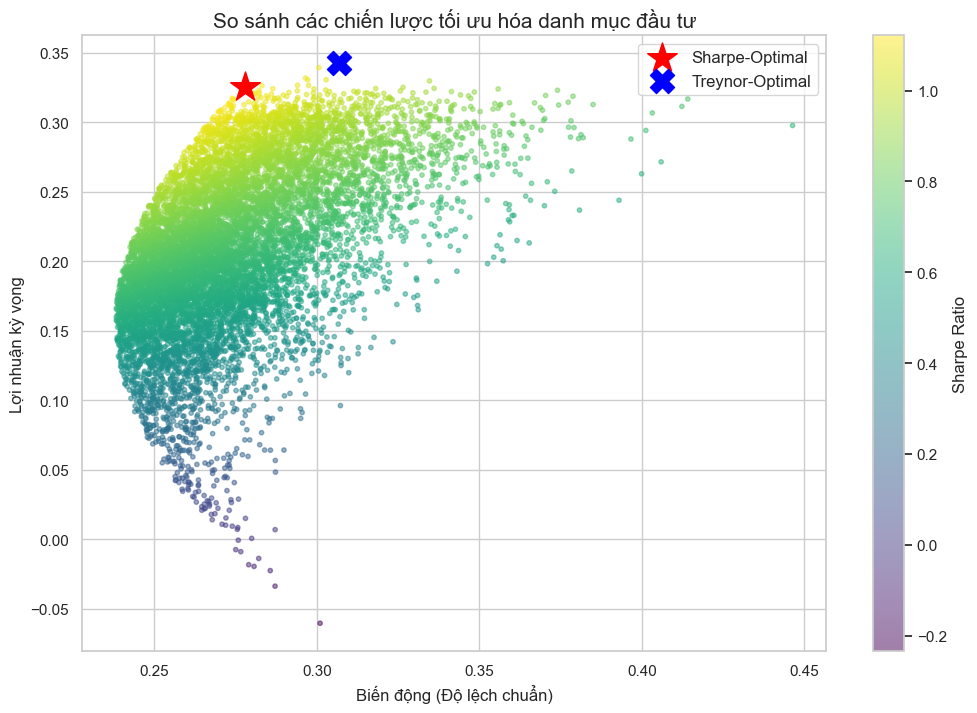

In [49]:
#  Trực quan hóa danh mục đầu tư tối ưu trên đường biên hiệu quả
plt.figure(figsize=(12, 8))

# Đồ thị biên hiệu quả
plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='viridis', alpha=0.5, s=10)
plt.colorbar(label='Sharpe Ratio')

# Đánh dấu các danh mục tối ưu
plt.scatter(
    sharpe_perf['volatility'],
    sharpe_perf['return'],
    marker='*',
    color='red',
    s=500,
    label='Sharpe-Optimal'
)
plt.scatter(
    treynor_perf['volatility'],
    treynor_perf['return'],
    marker='X',
    color='blue',
    s=300,
    label='Treynor-Optimal'
)

plt.title('So sánh các chiến lược tối ưu hóa danh mục đầu tư', fontsize=15)
plt.xlabel('Biến động (Độ lệch chuẩn)', fontsize=12)
plt.ylabel('Lợi nhuận kỳ vọng', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

Danh mục tối ưu theo Sharpe

Nằm ở vùng có lợi nhuận kỳ vọng cao nhưng vẫn duy trì mức độ biến động hợp lý.

Đây là danh mục có tỷ lệ Sharpe tốt nhất, tức là tối ưu về hiệu suất tổng thể khi xét trên toàn bộ độ lệch chuẩn.

Phù hợp cho nhà đầu tư muốn một danh mục ổn định nhưng vẫn mang lại lợi nhuận cao.

Danh mục tối ưu theo Treynor

Có lợi nhuận kỳ vọng cao hơn danh mục Sharpe.

Tuy nhiên, độ biến động cũng có thể cao hơn một chút, nhưng bù lại danh mục có hiệu suất vượt trội khi điều chỉnh theo rủi ro hệ thống (Beta).

Phù hợp cho nhà đầu tư muốn tối ưu hóa lợi nhuận dựa trên độ nhạy thị trường, thay vì chỉ xét biến động giá đơn thuần.



In [50]:
#  Tạo biểu đồ hình tròn cho từng danh mục đầu tư được tối ưu hóa

def create_portfolio_pie(weights_df, title, highlight_ticker=None):
    weights_df = weights_df.copy()

    # Lọc các trọng số rất nhỏ để trực quan hóa rõ ràng hơn
    weights_df = weights_df[weights_df['Weight'] > 0.01]

    # làm nổi bật các mã cụ thể
    if highlight_ticker:
        pull_values = [0.1 if ticker == highlight_ticker else 0 for ticker in weights_df['Ticker']]
    else:
        pull_values = [0] * len(weights_df)

    fig = go.Figure(data=[go.Pie(
        labels=weights_df['Ticker'],
        values=weights_df['Weight'],
        marker=dict(line=dict(color='#000000', width=2)),
        pull=pull_values
    )])

    fig.update_layout(title_text=title)
    return fig

# Tạo biểu đồ tròn cho mỗi chiến lược
sharpe_pie = create_portfolio_pie(
    sharpe_weights_df,
    'Phân bổ trọng số trong danh mục đầu tư tối ưu theo Sharpe',
    highlight_ticker='CTG'
)
sharpe_pie.show()

treynor_pie = create_portfolio_pie(
    treynor_weights_df,
    'Phân bổ trọng số trong danh mục đầu tư tối ưu theo Treynor',
    highlight_ticker='CTG'
)
treynor_pie.show()

Danh mục tối ưu theo Sharpe :

Phân bổ trọng số:

CTG chiếm 73.3%

CMG chiếm 22.0%

HSG chiếm 4.66%

VIC gần như không có trọng số

Nhận xét:

Danh mục này có sự phân bổ đa dạng giữa nhiều cổ phiếu, giúp giảm rủi ro tổng thể bằng cách không tập trung toàn bộ vốn vào một cổ phiếu duy nhất.

CTG có tỷ trọng lớn nhất, phản ánh rằng nó mang lại hiệu suất tốt nhất trên mỗi đơn vị rủi ro chung của danh mục.

CMG vẫn giữ một tỷ trọng đáng kể, cho thấy cổ phiếu này cũng có tiềm năng sinh lời, dù mức độ biến động có thể cao hơn.

HSG có tỷ trọng nhỏ, có thể nhằm hỗ trợ đa dạng hóa mà không ảnh hưởng nhiều đến hiệu suất tổng thể.

VIC gần như bị loại bỏ, điều này hợp lý vì lợi nhuận kỳ vọng của VIC âm, làm giảm hiệu suất danh mục.

Kết luận: Danh mục tối ưu theo Sharpe cân bằng giữa rủi ro và lợi nhuận, mang lại hiệu suất cao nhất trên mỗi đơn vị rủi ro chung (volatility).

Danh mục tối ưu theo Treynor
Phân bổ trọng số:

CTG chiếm 100%

CMG, HSG, VIC bị loại bỏ hoàn toàn

Nhận xét:

Danh mục này không có sự đa dạng hóa, mà tập trung 100% vào CTG, phản ánh rằng đây là cổ phiếu có hiệu suất tốt nhất trên mỗi đơn vị rủi ro hệ thống (Beta).

Không có cổ phiếu nào khác ngoài CTG, điều này có thể là do các cổ phiếu còn lại có Beta cao hoặc không mang lại lợi nhuận xứng đáng trên mỗi đơn vị rủi ro hệ thống.

Rủi ro của danh mục Treynor có thể cao hơn, vì toàn bộ danh mục phụ thuộc vào biến động của CTG. Nếu CTG giảm mạnh, danh mục sẽ không có bất kỳ sự bảo vệ nào từ các cổ phiếu khác.

Kết luận: Danh mục tối ưu theo Treynor tối đa hóa lợi nhuận trên mỗi đơn vị rủi ro hệ thống, nhưng thiếu sự đa dạng hóa, khiến rủi ro cao hơn nếu cổ phiếu CTG gặp biến động tiêu cực.

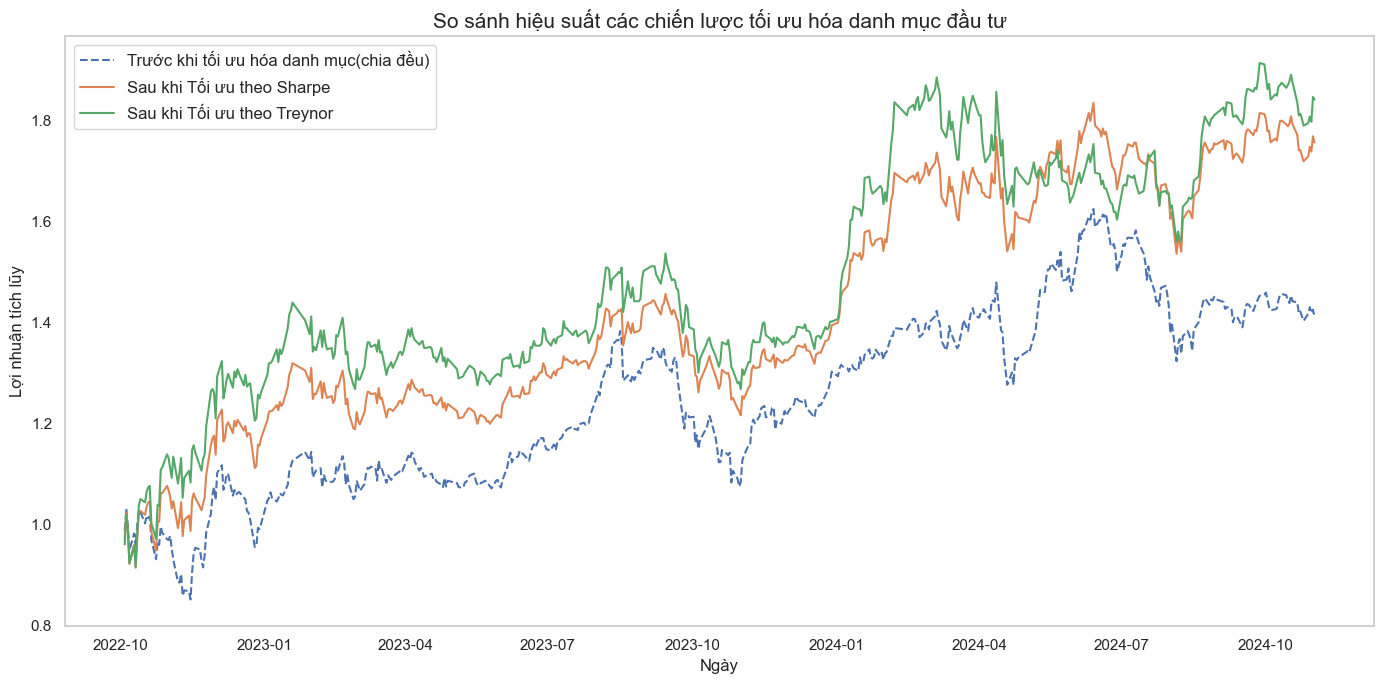

In [51]:
#  Tính toán và vẽ biểu đồ kết quả Backtest cho danh mục đầu tư được tối ưu hóa
# Tính lợi nhuận tích lũy
cumulative_returns = (daily_returns + 1).cumprod()

# Tính lợi nhuận cho từng danh mục đầu tư
equal_weights = np.array([1.0 / len(unique_tickers)] * len(unique_tickers))
equal_portfolio_returns = cumulative_returns.dot(equal_weights)

sharpe_portfolio_returns = cumulative_returns.dot(sharpe_weights)
treynor_portfolio_returns = cumulative_returns.dot(treynor_weights)

#Vẽ biểu đồ so sánh
plt.figure(figsize=(14, 7))
plt.plot(cumulative_returns.index, equal_portfolio_returns, label='Trước khi tối ưu hóa danh mục(chia đều)', linestyle='--')
plt.plot(cumulative_returns.index, sharpe_portfolio_returns, label='Sau khi Tối ưu theo Sharpe')
plt.plot(cumulative_returns.index, treynor_portfolio_returns, label='Sau khi Tối ưu theo Treynor')

plt.title('So sánh hiệu suất các chiến lược tối ưu hóa danh mục đầu tư', fontsize=15)
plt.xlabel('Ngày', fontsize=12)
plt.ylabel('Lợi nhuận tích lũy', fontsize=12)
plt.legend(fontsize=12)
plt.grid()
plt.tight_layout()
plt.show()

Danh mục không tối ưu :

Đây là danh mục cơ bản với phân bổ đều hoặc chưa được tối ưu hóa, cho thấy mức lợi nhuận tích lũy thấp hơn so với các chiến lược tối ưu.

Trong giai đoạn từ 2022 đến 2024, lợi nhuận tích lũy của nó nằm ở mức thấp hơn (xuất phát từ khoảng 0.9 và kết thúc dưới 1.4), cho thấy hiệu suất không đạt được tiềm năng tối đa.

Danh mục tối ưu theo Sharpe :

Chiến lược tối ưu này cải thiện hiệu suất bằng cách tối đa hóa lợi nhuận vượt trội so với rủi ro tổng thể (biến động toàn cục).

Đường hiệu suất màu cam có xu hướng tăng nhanh hơn so với danh mục không tối ưu, và kết thúc ở mức lợi nhuận tích lũy cao hơn (gần khoảng 1.6 - 1.8) so với đường xanh.

Điều này cho thấy rằng, khi kiểm soát rủi ro thông qua độ lệch chuẩn, danh mục tối ưu theo Sharpe mang lại hiệu quả đầu tư tốt hơn.

Danh mục tối ưu theo Treynor :

Chiến lược Treynor tập trung vào tối đa hóa lợi nhuận trên mỗi đơn vị rủi ro hệ thống (Beta).

Đường hiệu suất của chiến lược này luôn nằm trên hai chiến lược còn lại, đặc biệt là về phần cuối của khoảng thời gian, đạt lợi nhuận tích lũy cao nhất (trên 1.8).

Điều này cho thấy nếu bạn đánh giá hiệu quả theo rủi ro thị trường (hệ thống), danh mục tối ưu theo Treynor thể hiện khả năng tạo ra lợi nhuận vượt trội hơn.

Nhận xét:

Hiệu quả của quá trình tối ưu: Cả hai chiến lược tối ưu hóa đều cải thiện đáng kể hiệu suất của danh mục so với trạng thái ban đầu. Điều này chứng tỏ rằng các phương pháp tối ưu dựa trên tỷ lệ Sharpe và Treynor đều có tác động tích cực, nhưng theo từng góc nhìn khác nhau về rủi ro.

So sánh giữa Sharpe và Treynor:

Danh mục tối ưu theo Sharpe mang lại hiệu suất tốt nhờ kiểm soát rủi ro toàn diện (toàn bộ độ biến động). Đây là lựa chọn phù hợp nếu bạn muốn có một danh mục ổn định, giảm thiểu những dao động bất thường.

Danh mục tối ưu theo Treynor lại tập trung vào rủi ro hệ thống và cho thấy hiệu suất vượt trội hơn. Nếu bạn tin rằng rủi ro chủ yếu đến từ biến động chung của thị trường và muốn tối đa hóa lợi nhuận trên mỗi đơn vị rủi ro liên quan đến thị trường (Beta), thì chiến lược này là phù hợp.

Số dòng dữ liệu của cổ phiếu CTG: 522
        date   open   high    low  close   volume stock_name  %_change  \
0 2022-10-03  20310  20580  19330  19330  5690400        CTG  0.135307   
1 2022-10-04  19690  20310  18350  18570  5635700        CTG -3.930000   
2 2022-10-05  19060  19870  19060  19690  4275300        CTG  6.030000   
3 2022-10-06  19690  19910  19020  19150  4256200        CTG -2.740000   
4 2022-10-07  19060  19060  17850  17850  8381600        CTG -6.790000   

        change  year  quarter  month  Daily Return  
0    31.168582  2022        4     10           NaN  
1  -760.000000  2022        4     10     -0.039317  
2  1120.000000  2022        4     10      0.060312  
3  -540.000000  2022        4     10     -0.027425  
4 -1300.000000  2022        4     10     -0.067885  

Buy & Hold Cumulative Return: 84.17%
SMA Crossover Strategy Cumulative Return: 21.25%
Strategy Sharpe Ratio: 0.58
Maximum Drawdown: -18.83%


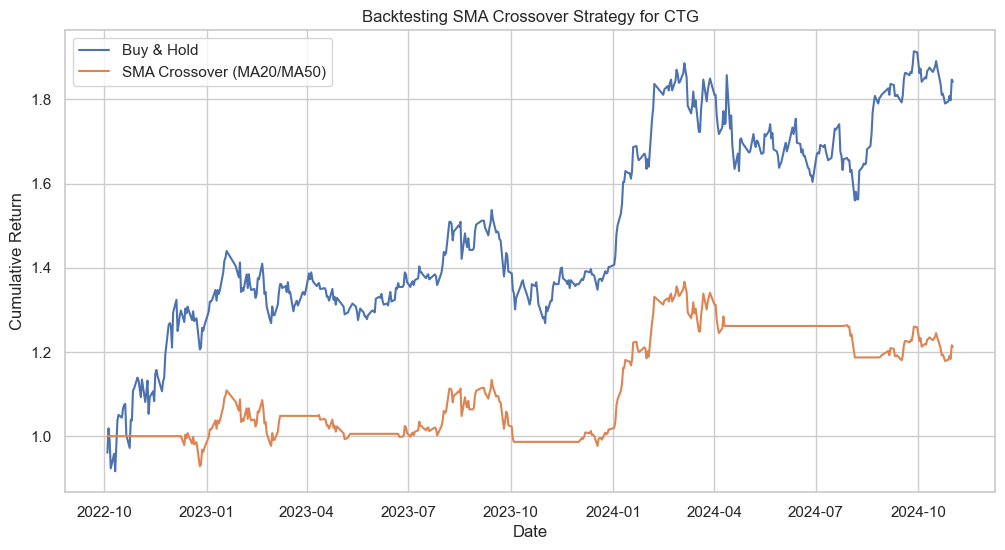

Số dòng dữ liệu của cổ phiếu HSG: 522
        date   open   high    low  close    volume stock_name  %_change  \
0 2022-10-03  14000  14050  13060  13060   8849000        HSG  0.127395   
1 2022-10-04  13240  13340  12350  12350   6779700        HSG -5.440000   
2 2022-10-05  12730  12960  12490  12820   4890900        HSG  3.810000   
3 2022-10-06  12820  12910  11970  11970   8350300        HSG -6.630000   
4 2022-10-07  11450  11730  11170  11170  10420600        HSG -6.680000   

       change  year  quarter  month  Daily Return  
0   13.678161  2022        4     10           NaN  
1 -710.000000  2022        4     10     -0.054364  
2  470.000000  2022        4     10      0.038057  
3 -850.000000  2022        4     10     -0.066303  
4 -800.000000  2022        4     10     -0.066834  

Buy & Hold Cumulative Return: 54.67%
SMA Crossover Strategy Cumulative Return: 1.34%
Strategy Sharpe Ratio: 0.18
Maximum Drawdown: -64.28%


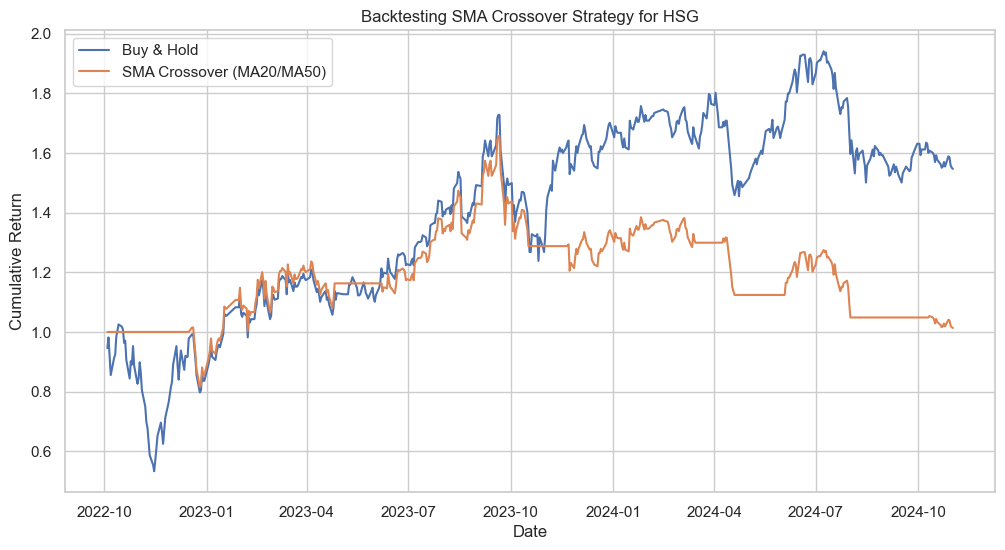

Số dòng dữ liệu của cổ phiếu CMG: 522
        date   open   high    low  close  volume stock_name  %_change  \
0 2022-10-03  35840  35840  33340  33340  126800        CMG  0.106616   
1 2022-10-04  33340  34280  33340  34000   67400        CMG  1.980000   
2 2022-10-05  35220  35690  34200  34820   28500        CMG  2.410000   
3 2022-10-06  34510  35180  33340  33380   27900        CMG -4.140000   
4 2022-10-07  33380  33380  31070  31070  218000        CMG -6.920000   

        change  year  quarter  month  Daily Return  
0    33.001912  2022        4     10           NaN  
1   660.000000  2022        4     10      0.019796  
2   820.000000  2022        4     10      0.024118  
3 -1440.000000  2022        4     10     -0.041356  
4 -2310.000000  2022        4     10     -0.069203  

Buy & Hold Cumulative Return: 51.77%
SMA Crossover Strategy Cumulative Return: 60.53%
Strategy Sharpe Ratio: 0.99
Maximum Drawdown: -42.70%


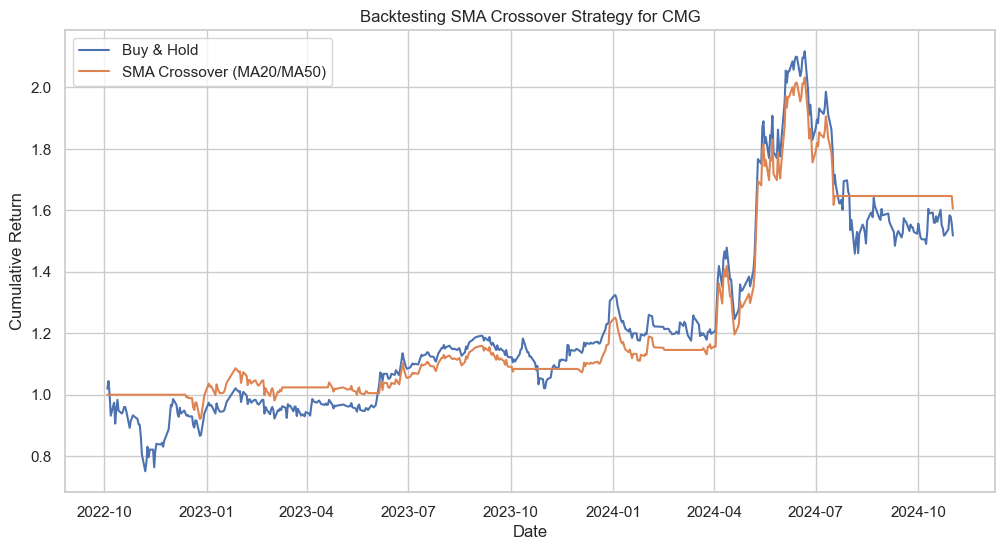

Số dòng dữ liệu của cổ phiếu VIC: 522
        date   open   high    low  close   volume stock_name  %_change  \
0 2022-10-03  54900  55500  53000  55500  1452700        VIC -0.037088   
1 2022-10-04  56000  57000  54600  57000  1296700        VIC  2.700000   
2 2022-10-05  57500  60900  57000  60000  1328100        VIC  5.260000   
3 2022-10-06  59800  62000  58100  60100  1011900        VIC  0.170000   
4 2022-10-07  60500  60700  58300  60200  2987900        VIC  0.170000   

        change  year  quarter  month  Daily Return  
0   -27.394636  2022        4     10           NaN  
1  1500.000000  2022        4     10      0.027027  
2  3000.000000  2022        4     10      0.052632  
3   100.000000  2022        4     10      0.001667  
4   100.000000  2022        4     10      0.001664  

Buy & Hold Cumulative Return: -25.77%
SMA Crossover Strategy Cumulative Return: -39.81%
Strategy Sharpe Ratio: -1.13
Maximum Drawdown: -43.33%


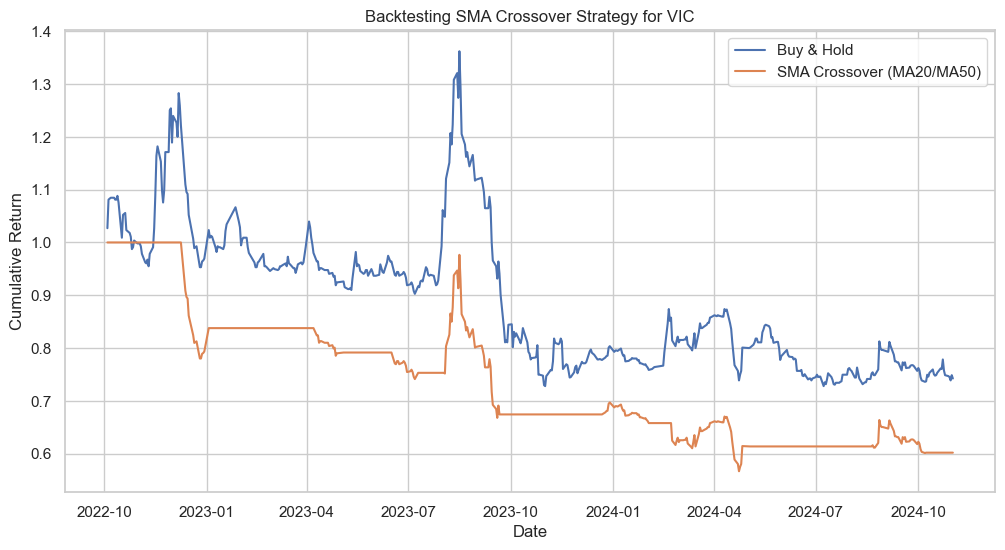

In [52]:
# Danh sách các mã cổ phiếu
all_stocks = Stock_price_df["stock_name"].unique()

# Vòng lặp qua từng mã cổ phiếu
for stock in all_stocks:
    # Lọc dữ liệu cho cổ phiếu hiện tại
    stock_data = Stock_price_df[Stock_price_df["stock_name"] == stock].sort_values("date").reset_index(drop=True)

    print(f"Số dòng dữ liệu của cổ phiếu {stock}: {len(stock_data)}")
    print(stock_data.head())

    # Bước 2: Tính toán trung bình động (MA20 và MA50)
    short_window = 20
    long_window = 50
    stock_data["MA20"] = stock_data["close"].rolling(window=short_window).mean()
    stock_data["MA50"] = stock_data["close"].rolling(window=long_window).mean()

    # Bước 3: Sinh tín hiệu giao dịch dựa trên giao cắt MA
    stock_data["signal"] = 0
    stock_data.loc[stock_data["MA20"] > stock_data["MA50"], "signal"] = 1
    stock_data["signal_lag"] = stock_data["signal"].shift(1)

    # Bước 4: Tính toán lợi nhuận
    stock_data["return"] = stock_data["close"].pct_change()
    stock_data["strategy_return"] = stock_data["return"] * stock_data["signal_lag"]
    stock_data["cum_return_buy_hold"] = (1 + stock_data["return"]).cumprod()
    stock_data["cum_return_strategy"] = (1 + stock_data["strategy_return"]).cumprod()

    # Tính toán Sharpe Ratio và Maximum Drawdown
    risk_free_rate = 0
    trading_days = 252
    strategy_daily_return = stock_data["strategy_return"].dropna()

    if strategy_daily_return.std() != 0:
        sharpe_ratio = ((strategy_daily_return.mean() - risk_free_rate) / strategy_daily_return.std()) * np.sqrt(trading_days)
    else:
        sharpe_ratio = np.nan

    stock_data["cum_max"] = stock_data["cum_return_strategy"].cummax()
    stock_data["drawdown"] = stock_data["cum_return_strategy"] - stock_data["cum_max"]
    max_drawdown = stock_data["drawdown"].min()

    print("\nBuy & Hold Cumulative Return: {:.2f}%".format((stock_data["cum_return_buy_hold"].iloc[-1] - 1) * 100))
    print("SMA Crossover Strategy Cumulative Return: {:.2f}%".format((stock_data["cum_return_strategy"].iloc[-1] - 1) * 100))
    print("Strategy Sharpe Ratio: {:.2f}".format(sharpe_ratio))
    print("Maximum Drawdown: {:.2f}%".format(max_drawdown * 100))

    # Bước 5: Vẽ biểu đồ so sánh hiệu suất
    plt.figure(figsize=(12, 6))
    plt.plot(stock_data["date"], stock_data["cum_return_buy_hold"], label="Buy & Hold")
    plt.plot(stock_data["date"], stock_data["cum_return_strategy"], label="SMA Crossover (MA20/MA50)")
    plt.xlabel("Date")
    plt.ylabel("Cumulative Return")
    plt.title(f"Backtesting SMA Crossover Strategy for {stock}")
    plt.legend()
    plt.grid(True)
    plt.show()

CTG:
Hiệu Suất Tích Lũy (Cumulative Return)

Buy & Hold: 84.17% Chiến lược mua và giữ (Buy & Hold) đã tạo ra mức tăng trưởng vốn tích lũy rất ấn tượng, cho thấy rằng, nếu đầu tư và giữ cổ phiếu CTG trong suốt giai đoạn thử nghiệm, nhà đầu tư có thể nhận được lợi nhuận cao.

SMA Crossover Strategy: 21.25% Trong khi đó, chiến lược giao cắt đường trung bình động (SMA Crossover) chỉ đạt được lợi nhuận tích lũy thấp hơn đáng kể. Điều này có thể chỉ ra rằng các tín hiệu mua – bán dựa trên giao cắt SMA đã khiến chiến lược bỏ lỡ một số đợt tăng giá quan trọng hoặc không kịp nắm bắt xu hướng tăng của cổ phiếu.

Sharpe Ratio (0.58)

Ý nghĩa: Sharpe Ratio được sử dụng để đánh giá hiệu suất lợi nhuận điều chỉnh theo rủi ro. Một tỷ lệ 0.58 cho thấy chiến lược (có thể là của SMA Crossover) đang cung cấp lợi nhuận trên mỗi đơn vị rủi ro với mức trung bình.

Insight: Mặc dù không quá ấn tượng so với một số mức chuẩn (ví dụ Sharpe > 1 thường được xem là tốt), nhưng nó cũng cho thấy chiến lược có một mức độ vượt trội nhất định so với rủi ro mà nhà đầu tư phải gánh chịu. Tuy nhiên, mức này cũng cảnh báo rằng không có sự bù đắp lợi nhuận cực kỳ mạnh mẽ khi rủi ro được điều chỉnh.

Maximum Drawdown (-18.83%)

Ý nghĩa: Maximum Drawdown cho biết mức giảm tối đa của danh mục trong giai đoạn backtest. Mức -18.83% báo hiệu rằng, trong một khoảng thời gian nhất định, danh mục đã trải qua giai đoạn giảm sâu lên tới gần 19%.

Insight: Một mức giảm như vậy cho thấy chiến lược gặp phải những giai đoạn khó khăn. Đây là điểm cần lưu ý cho những nhà đầu tư có khẩu vị rủi ro thấp, vì mặc dù Buy & Hold mang lại lợi nhuận tích lũy cao, nhưng cũng có khả năng chịu đựng những đợt giảm giá mạnh.

In [53]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

def generate_investment_plan(optimal_weights, stock_data, initial_investment=100000000, rebalance_freq='quarterly'):
    """
    Tạo kế hoạch đầu tư cụ thể với số tiền phân bổ và lịch tái cân bằng

    Tham số:
    - optimal_weights: dict, trọng số tối ưu cho mỗi mã cổ phiếu
    - stock_data: dict hoặc DataFrame, dữ liệu giá cổ phiếu hiện tại
    - initial_investment: float, số tiền đầu tư ban đầu (VND)
    - rebalance_freq: str, tần suất tái cân bằng ('monthly', 'quarterly', 'semi-annual', 'annual')

    Trả về:
    - dict, kế hoạch đầu tư chi tiết
    """

    if not optimal_weights:
        print("Cần có phân bổ tối ưu để tạo kế hoạch đầu tư")
        return None

    print(f"Tạo kế hoạch đầu tư với số vốn {initial_investment:,.0f} VND...")

    # Tính toán số tiền phân bổ cho từng cổ phiếu
    allocation = {}
    for symbol, weight in optimal_weights.items():
        allocation[symbol] = weight * initial_investment

    # Xác định giá hiện tại và số lượng cổ phiếu có thể mua
    shares = {}
    remaining_cash = 0

    for symbol, amount in allocation.items():
        # Kiểm tra xem stock_data là dict hay DataFrame
        if isinstance(stock_data, dict):
            if symbol in stock_data:
                current_price = stock_data[symbol]['Adj Close'].iloc[-1]
                shares_to_buy = int(amount / current_price)  # Làm tròn xuống
                shares[symbol] = shares_to_buy

                # Tính số tiền còn lại sau khi mua
                remaining_cash += amount - (shares_to_buy * current_price)
            else:
                print(f"Không tìm thấy giá hiện tại cho {symbol}")
        else:  # Nếu stock_data là DataFrame
            stock_price_df = stock_data
            if symbol in stock_price_df['stock_name'].unique():
                # Lấy giá đóng cửa gần nhất của mã cổ phiếu
                current_price = stock_price_df[stock_price_df['stock_name'] == symbol]['close'].iloc[-1]
                shares_to_buy = int(amount / current_price)  # Làm tròn xuống
                shares[symbol] = shares_to_buy

                # Tính số tiền còn lại sau khi mua
                remaining_cash += amount - (shares_to_buy * current_price)
            else:
                print(f"Không tìm thấy giá hiện tại cho {symbol}")

    # Xác định lịch tái cân bằng
    today = datetime.now()
    rebalance_dates = []

    if rebalance_freq == 'monthly':
        for i in range(1, 13):
            next_date = today + timedelta(days=30*i)
            rebalance_dates.append(next_date.strftime('%Y-%m-%d'))
    elif rebalance_freq == 'quarterly':
        for i in range(1, 5):
            next_date = today + timedelta(days=90*i)
            rebalance_dates.append(next_date.strftime('%Y-%m-%d'))
    elif rebalance_freq == 'semi-annual':
        for i in range(1, 3):
            next_date = today + timedelta(days=180*i)
            rebalance_dates.append(next_date.strftime('%Y-%m-%d'))
    else:  # annual
        next_date = today + timedelta(days=365)
        rebalance_dates.append(next_date.strftime('%Y-%m-%d'))

    # Tạo kế hoạch đầu tư
    investment_plan = {
        'date_created': today.strftime('%Y-%m-%d'),
        'initial_investment': initial_investment,
        'target_allocation': optimal_weights,
        'monetary_allocation': allocation,
        'shares_to_buy': shares,
        'remaining_cash': remaining_cash,
        'rebalance_frequency': rebalance_freq,
        'next_rebalance_dates': rebalance_dates
    }

    # In kế hoạch
    print("\nKế hoạch đầu tư:")
    print(f"  Tổng vốn đầu tư: {initial_investment:,.0f} VND")
    print(f"  Tần suất tái cân bằng: {rebalance_freq}")
    print(f"  Phân bổ cụ thể:")

    for symbol, weight in optimal_weights.items():
        amount = allocation[symbol]
        share_count = shares.get(symbol, 0)

        # Hiển thị thông tin chi tiết cho từng mã cổ phiếu
        if isinstance(stock_data, dict):
            if symbol in stock_data:
                current_price = stock_data[symbol]['Adj Close'].iloc[-1]
                print(f"    • {symbol}: {weight*100:.2f}% = {amount:,.0f} VND = {share_count} cổ phiếu @ {current_price:,.0f} VND/cp")
        else:  # Nếu stock_data là DataFrame
            if symbol in stock_price_df['stock_name'].unique():
                current_price = stock_price_df[stock_price_df['stock_name'] == symbol]['close'].iloc[-1]
                print(f"    • {symbol}: {weight*100:.2f}% = {amount:,.0f} VND = {share_count} cổ phiếu @ {current_price:,.0f} VND/cp")

    print(f"  Tiền mặt còn lại: {remaining_cash:,.0f} VND")

    return investment_plan


def rebalance_portfolio(investment_plan, current_stock_data, add_investment=0):
    """
    Tái cân bằng danh mục đầu tư theo kế hoạch

    Tham số:
    - investment_plan: dict, kế hoạch đầu tư hiện tại
    - current_stock_data: dict hoặc DataFrame, dữ liệu giá cổ phiếu hiện tại
    - add_investment: float, số tiền đầu tư thêm (nếu có)

    Trả về:
    - dict, kế hoạch đầu tư đã được cập nhật sau tái cân bằng
    """
    if not investment_plan:
        print("Cần có kế hoạch đầu tư để tái cân bằng")
        return None

    print(f"\n Bắt đầu tái cân bằng danh mục đầu tư...")

    # Tính toán giá trị hiện tại của danh mục
    current_value = investment_plan['remaining_cash']
    current_shares = investment_plan['shares_to_buy'].copy()
    target_allocation = investment_plan['target_allocation']

    # Tính tổng giá trị danh mục hiện tại
    for symbol, shares in current_shares.items():
        if isinstance(current_stock_data, dict):
            if symbol in current_stock_data:
                current_price = current_stock_data[symbol]['Adj Close'].iloc[-1]
                stock_value = shares * current_price
                current_value += stock_value
        else:  # Nếu current_stock_data là DataFrame
            stock_price_df = current_stock_data
            if symbol in stock_price_df['stock_name'].unique():
                current_price = stock_price_df[stock_price_df['stock_name'] == symbol]['close'].iloc[-1]
                stock_value = shares * current_price
                current_value += stock_value

    # Thêm vốn mới (nếu có)
    total_value = current_value + add_investment
    print(f"Giá trị danh mục trước tái cân bằng: {current_value:,.0f} VND")
    if add_investment > 0:
        print(f"Vốn đầu tư thêm: {add_investment:,.0f} VND")
    print(f"Tổng giá trị sau khi thêm vốn: {total_value:,.0f} VND")

    # Tính toán phân bổ mới
    new_allocation = {}
    for symbol, weight in target_allocation.items():
        new_allocation[symbol] = weight * total_value

    # Xác định giao dịch cần thực hiện
    transactions = {}
    new_shares = {}

    for symbol, target_amount in new_allocation.items():
        if isinstance(current_stock_data, dict):
            if symbol in current_stock_data:
                current_price = current_stock_data[symbol]['Adj Close'].iloc[-1]
                target_shares = int(target_amount / current_price)
                current_share_count = current_shares.get(symbol, 0)
                share_difference = target_shares - current_share_count

                transactions[symbol] = {
                    'current_shares': current_share_count,
                    'target_shares': target_shares,
                    'share_difference': share_difference,
                    'current_price': current_price,
                    'transaction_amount': share_difference * current_price
                }

                new_shares[symbol] = target_shares
        else:  # Nếu current_stock_data là DataFrame
            stock_price_df = current_stock_data
            if symbol in stock_price_df['stock_name'].unique():
                current_price = stock_price_df[stock_price_df['stock_name'] == symbol]['close'].iloc[-1]
                target_shares = int(target_amount / current_price)
                current_share_count = current_shares.get(symbol, 0)
                share_difference = target_shares - current_share_count

                transactions[symbol] = {
                    'current_shares': current_share_count,
                    'target_shares': target_shares,
                    'share_difference': share_difference,
                    'current_price': current_price,
                    'transaction_amount': share_difference * current_price
                }

                new_shares[symbol] = target_shares

    # Tính toán số tiền thực tế cần để thực hiện giao dịch
    total_buy_amount = sum([t['transaction_amount'] for s, t in transactions.items() if t['share_difference'] > 0])
    total_sell_amount = sum([t['transaction_amount'] for s, t in transactions.items() if t['share_difference'] < 0])

    # Tính toán số tiền mặt còn lại
    new_cash = investment_plan['remaining_cash'] + add_investment + abs(total_sell_amount) - total_buy_amount

    # Cập nhật kế hoạch đầu tư
    updated_plan = investment_plan.copy()
    updated_plan['date_rebalanced'] = datetime.now().strftime('%Y-%m-%d')
    updated_plan['portfolio_value_before_rebalance'] = current_value
    updated_plan['additional_investment'] = add_investment
    updated_plan['portfolio_value_after_rebalance'] = total_value
    updated_plan['shares_to_buy'] = new_shares
    updated_plan['remaining_cash'] = new_cash
    updated_plan['rebalance_transactions'] = transactions

    # Cập nhật ngày tái cân bằng tiếp theo
    today = datetime.now()
    rebalance_freq = investment_plan['rebalance_frequency']
    next_rebalance_dates = []

    if rebalance_freq == 'monthly':
        for i in range(1, 13):
            next_date = today + timedelta(days=30*i)
            next_rebalance_dates.append(next_date.strftime('%Y-%m-%d'))
    elif rebalance_freq == 'quarterly':
        for i in range(1, 5):
            next_date = today + timedelta(days=90*i)
            next_rebalance_dates.append(next_date.strftime('%Y-%m-%d'))
    elif rebalance_freq == 'semi-annual':
        for i in range(1, 3):
            next_date = today + timedelta(days=180*i)
            next_rebalance_dates.append(next_date.strftime('%Y-%m-%d'))
    else:  # annual
        next_date = today + timedelta(days=365)
        next_rebalance_dates.append(next_date.strftime('%Y-%m-%d'))

    updated_plan['next_rebalance_dates'] = next_rebalance_dates

    # In kết quả tái cân bằng
    print("\nKết quả tái cân bằng:")
    print(f"  Ngày tái cân bằng: {updated_plan['date_rebalanced']}")
    print(f"  Giao dịch cần thực hiện:")

    for symbol, t in transactions.items():
        if t['share_difference'] != 0:
            action = "MUA" if t['share_difference'] > 0 else "BÁN"
            print(f"    • {symbol}: {action} {abs(t['share_difference'])} cổ phiếu @ {t['current_price']:,.0f} VND = {abs(t['transaction_amount']):,.0f} VND")

    print(f"  Tổng giá trị MUA: {total_buy_amount:,.0f} VND")
    print(f"  Tổng giá trị BÁN: {abs(total_sell_amount):,.0f} VND")
    print(f"  Tiền mặt còn lại sau tái cân bằng: {new_cash:,.0f} VND")
    print(f"  Ngày tái cân bằng tiếp theo: {next_rebalance_dates[0]}")

    return updated_plan


In [54]:
optimal_weights_sharpe = dict(zip(sharpe_weights_df["Ticker"], sharpe_weights_df["Weight"]))

In [57]:
Stock_price_current = pd.read_csv(r'C:\Users\hsvie\Desktop\nckh\data\Stock_price_current.csv')

In [58]:
investment_plan = generate_investment_plan(optimal_weights_sharpe, Stock_price_current, initial_investment=100000000, rebalance_freq='quarterly')

Tạo kế hoạch đầu tư với số vốn 100,000,000 VND...

Kế hoạch đầu tư:
  Tổng vốn đầu tư: 100,000,000 VND
  Tần suất tái cân bằng: quarterly
  Phân bổ cụ thể:
    • CMG: 22.03% = 22,025,838 VND = 571 cổ phiếu @ 38,550 VND/cp
    • CTG: 73.31% = 73,313,729 VND = 1751 cổ phiếu @ 41,850 VND/cp
    • HSG: 4.66% = 4,660,433 VND = 272 cổ phiếu @ 17,100 VND/cp
    • VIC: 0.00% = 0 VND = 0 cổ phiếu @ 59,700 VND/cp
  Tiền mặt còn lại: 57,400 VND


In [59]:
rebalance = rebalance_portfolio(investment_plan, Stock_price_current, add_investment=50000000)


 Bắt đầu tái cân bằng danh mục đầu tư...
Giá trị danh mục trước tái cân bằng: 100,000,000 VND
Vốn đầu tư thêm: 50,000,000 VND
Tổng giá trị sau khi thêm vốn: 150,000,000 VND

Kết quả tái cân bằng:
  Ngày tái cân bằng: 2025-04-18
  Giao dịch cần thực hiện:
    • CMG: MUA 286 cổ phiếu @ 38,550 VND = 11,025,300 VND
    • CTG: MUA 876 cổ phiếu @ 41,850 VND = 36,660,600 VND
    • HSG: MUA 136 cổ phiếu @ 17,100 VND = 2,325,600 VND
  Tổng giá trị MUA: 50,011,500 VND
  Tổng giá trị BÁN: 0 VND
  Tiền mặt còn lại sau tái cân bằng: 45,900 VND
  Ngày tái cân bằng tiếp theo: 2025-07-17
